In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [2]:
data= pd.read_csv('/Users/macos/Documents/Quests/loan/loans_full_schema.csv')
data

emp_title  emp_length state homeownership  annual_income  \
0     global config engineer          3.0    NJ      MORTGAGE        90000.0   
1      warehouse office clerk        10.0    HI          RENT        40000.0   
2                    assembly         3.0    WI          RENT        40000.0   
3            customer service         1.0    PA          RENT        30000.0   
4        security supervisor         10.0    CA          RENT        35000.0   
...                       ...         ...   ...           ...            ...   
9995                   owner         10.0    TX          RENT       108000.0   
9996                 director         8.0    PA      MORTGAGE       121000.0   
9997                toolmaker        10.0    CT      MORTGAGE        67000.0   
9998                  manager         1.0    WI      MORTGAGE        80000.0   
9999       operations analyst         3.0    CT          RENT        66000.0   

      verified_income  debt_to_income  annual_income_joint  \
0            Verified           18.01                  NaN   
1        Not Verified            5.04                  NaN   
2     Source Verified           21.15                  NaN   
3        Not Verified           10.16                  NaN   
4            Verified           57.96              57000.0   
...               ...             ...                  ...   
9995  Source Verified           22.28                  NaN   
9996         Verified           32.38                  NaN   
9997         Verified           45.26             107000.0   
9998  Source Verified           11.99                  NaN   
9999     Not Verified           20.82                  NaN   

     verification_income_joint  debt_to_income_joint  delinq_2y  \
0                          NaN                   NaN          0   
1                          NaN                   NaN          0   
2                          NaN                   NaN          0   
3                          NaN                   NaN          0   
4                     Verified                 37.66          0   
...                        ...                   ...        ...   
9995                       NaN                   NaN          0   
9996                       NaN                   NaN          4   
9997           Source Verified                 29.57          2   
9998                       NaN                   NaN          0   
9999                       NaN                   NaN          0   

      months_since_last_delinq  earliest_credit_line  inquiries_last_12m  \
0                         38.0                  2001                   6   
1                          NaN                  1996                   1   
2                         28.0                  2006                   4   
3                          NaN                  2007                   0   
4                          NaN                  2008                   7   
...                        ...                   ...                 ...   
9995                       NaN                  2008                   5   
9996                       9.0                  1994                   1   
9997                       6.0                  2004                   0   
9998                       NaN                  1999                   1   
9999                       NaN                  2005                   0   

      total_credit_lines  open_credit_lines  total_credit_limit  \
0                     28                 10               70795   
1                     30                 14               28800   
2                     31                 10               24193   
3                      4                  4               25400   
4                     22                 16               69839   
...                  ...                ...                 ...   
9995                  44                 13              199195   
9996                  28                 15              382

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [4]:
data.shape

(10000, 55)

In [5]:
data.nunique().sort_values(ascending=False)

total_credit_utilized               9497
total_credit_limit                  9119
paid_total                          7475
paid_interest                       7422
paid_principal                      5765
balance                             5741
emp_title                           4741
debt_to_income                      3673
installment                         3540
annual_income                       1463
total_debit_limit                   1222
debt_to_income_joint                1189
total_collection_amount_ever         896
loan_amount                          612
annual_income_joint                  596
account_never_delinq_percent         282
months_since_90d_late                106
months_since_last_delinq              97
total_credit_lines                    78
interest_rate                         58
num_total_cc_accounts                 56
earliest_credit_line                  53
state                                 50
open_credit_lines                     45
num_satisfactory

## data Cleaning: 

In [6]:
data.isna().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [7]:
data.months_since_last_credit_inquiry.value_counts()

months_since_last_credit_inquiry
1.0     796
2.0     740
0.0     693
3.0     663
4.0     651
5.0     576
6.0     554
7.0     510
8.0     473
9.0     385
10.0    375
11.0    279
13.0    268
12.0    247
14.0    226
15.0    215
16.0    183
18.0    172
17.0    166
19.0    131
21.0    108
20.0    106
22.0    103
23.0     76
24.0     33
Name: count, dtype: int64

In [8]:
data.disbursement_method.value_counts()

disbursement_method
Cash         9284
DirectPay     716
Name: count, dtype: int64

In [9]:
data.annual_income_joint.value_counts()

annual_income_joint
90000.0     31
100000.0    30
140000.0    24
105000.0    21
80000.0     20
            ..
90200.0      1
101578.0     1
155918.0     1
74120.0      1
70598.0      1
Name: count, Length: 596, dtype: int64

In [10]:
data.verification_income_joint.value_counts()

verification_income_joint
Not Verified       611
Source Verified    499
Verified           345
Name: count, dtype: int64

In [11]:
data.debt_to_income_joint.value_counts()

debt_to_income_joint
21.42    5
22.60    4
14.98    4
20.88    4
15.58    4
        ..
14.18    1
10.32    1
22.34    1
23.40    1
29.57    1
Name: count, Length: 1189, dtype: int64

In [12]:
data.months_since_last_delinq.value_counts()

months_since_last_delinq
25.0     87
9.0      86
24.0     85
36.0     83
12.0     83
         ..
109.0     1
88.0      1
99.0      1
106.0     1
98.0      1
Name: count, Length: 97, dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.eq(" ").sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
verification_income_joint           0
debt_to_income_joint                0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfac

In [15]:
loan_data= data.copy()
loan_data

emp_title  emp_length state homeownership  annual_income  \
0     global config engineer          3.0    NJ      MORTGAGE        90000.0   
1      warehouse office clerk        10.0    HI          RENT        40000.0   
2                    assembly         3.0    WI          RENT        40000.0   
3            customer service         1.0    PA          RENT        30000.0   
4        security supervisor         10.0    CA          RENT        35000.0   
...                       ...         ...   ...           ...            ...   
9995                   owner         10.0    TX          RENT       108000.0   
9996                 director         8.0    PA      MORTGAGE       121000.0   
9997                toolmaker        10.0    CT      MORTGAGE        67000.0   
9998                  manager         1.0    WI      MORTGAGE        80000.0   
9999       operations analyst         3.0    CT          RENT        66000.0   

      verified_income  debt_to_income  annual_income_joint  \
0            Verified           18.01                  NaN   
1        Not Verified            5.04                  NaN   
2     Source Verified           21.15                  NaN   
3        Not Verified           10.16                  NaN   
4            Verified           57.96              57000.0   
...               ...             ...                  ...   
9995  Source Verified           22.28                  NaN   
9996         Verified           32.38                  NaN   
9997         Verified           45.26             107000.0   
9998  Source Verified           11.99                  NaN   
9999     Not Verified           20.82                  NaN   

     verification_income_joint  debt_to_income_joint  delinq_2y  \
0                          NaN                   NaN          0   
1                          NaN                   NaN          0   
2                          NaN                   NaN          0   
3                          NaN                   NaN          0   
4                     Verified                 37.66          0   
...                        ...                   ...        ...   
9995                       NaN                   NaN          0   
9996                       NaN                   NaN          4   
9997           Source Verified                 29.57          2   
9998                       NaN                   NaN          0   
9999                       NaN                   NaN          0   

      months_since_last_delinq  earliest_credit_line  inquiries_last_12m  \
0                         38.0                  2001                   6   
1                          NaN                  1996                   1   
2                         28.0                  2006                   4   
3                          NaN                  2007                   0   
4                          NaN                  2008                   7   
...                        ...                   ...                 ...   
9995                       NaN                  2008                   5   
9996                       9.0                  1994                   1   
9997                       6.0                  2004                   0   
9998                       NaN                  1999                   1   
9999                       NaN                  2005                   0   

      total_credit_lines  open_credit_lines  total_credit_limit  \
0                     28                 10               70795   
1                     30                 14               28800   
2                     31                 10               24193   
3                      4                  4               25400   
4                     22                 16               69839   
...                  ...                ...                 ...   
9995                  44                 13              199195   
9996                  28                 15              382

In [16]:
loan_data.drop(columns=['annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late','months_since_last_credit_inquiry','emp_title','issue_month','initial_listing_status'], inplace = True)

In [17]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   emp_length                    9183 non-null   float64
 1   state                         10000 non-null  object 
 2   homeownership                 10000 non-null  object 
 3   annual_income                 10000 non-null  float64
 4   verified_income               10000 non-null  object 
 5   debt_to_income                9976 non-null   float64
 6   delinq_2y                     10000 non-null  int64  
 7   earliest_credit_line          10000 non-null  int64  
 8   inquiries_last_12m            10000 non-null  int64  
 9   total_credit_lines            10000 non-null  int64  
 10  open_credit_lines             10000 non-null  int64  
 11  total_credit_limit            10000 non-null  int64  
 12  total_credit_utilized         10000 non-null  int64  
 13  nu

In [18]:
loan_data.isna().sum()

emp_length                      817
state                             0
homeownership                     0
annual_income                     0
verified_income                   0
debt_to_income                   24
delinq_2y                         0
earliest_credit_line              0
inquiries_last_12m                0
total_credit_lines                0
open_credit_lines                 0
total_credit_limit                0
total_credit_utilized             0
num_collections_last_12m          0
num_historical_failed_to_pay      0
current_accounts_delinq           0
total_collection_amount_ever      0
current_installment_accounts      0
accounts_opened_24m               0
num_satisfactory_accounts         0
num_accounts_120d_past_due      318
num_accounts_30d_past_due         0
num_active_debit_accounts         0
total_debit_limit                 0
num_total_cc_accounts             0
num_open_cc_accounts              0
num_cc_carrying_balance           0
num_mort_accounts           

In [19]:
loan_data.emp_length.value_counts()

emp_length
10.0    3332
2.0      967
3.0      862
0.0      690
1.0      685
5.0      645
4.0      611
6.0      404
7.0      368
9.0      312
8.0      307
Name: count, dtype: int64

In [20]:
loan_data.dropna(inplace= True)

In [21]:
loan_data.shape

(8886, 46)

In [22]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   emp_length                    8886 non-null   float64
 1   state                         8886 non-null   object 
 2   homeownership                 8886 non-null   object 
 3   annual_income                 8886 non-null   float64
 4   verified_income               8886 non-null   object 
 5   debt_to_income                8886 non-null   float64
 6   delinq_2y                     8886 non-null   int64  
 7   earliest_credit_line          8886 non-null   int64  
 8   inquiries_last_12m            8886 non-null   int64  
 9   total_credit_lines            8886 non-null   int64  
 10  open_credit_lines             8886 non-null   int64  
 11  total_credit_limit            8886 non-null   int64  
 12  total_credit_utilized         8886 non-null   int64  
 13  num_coll

In [23]:
loan_data.verified_income.value_counts()

verified_income
Source Verified    3868
Not Verified       3182
Verified           1836
Name: count, dtype: int64

In [24]:
loan_data['verified_income']=loan_data['verified_income'].replace('Source Verified','Verified')

In [25]:
loan_data.verified_income.value_counts()

verified_income
Verified        5704
Not Verified    3182
Name: count, dtype: int64

In [26]:
loan_data['verified_income'] = loan_data['verified_income'] == 'Verified'

In [27]:
loan_data.verified_income.value_counts()

verified_income
True     5704
False    3182
Name: count, dtype: int64

In [28]:
loan_data.verified_income.info()

<class 'pandas.core.series.Series'>
Index: 8886 entries, 0 to 9999
Series name: verified_income
Non-Null Count  Dtype
--------------  -----
8886 non-null   bool 
dtypes: bool(1)
memory usage: 78.1 KB


In [29]:
loan_data.loan_status.value_counts()

loan_status
Current               8328
Fully Paid             411
In Grace Period         54
Late (31-120 days)      54
Late (16-30 days)       34
Charged Off              5
Name: count, dtype: int64

In [30]:
replacements = {
    'Late (16-30 days)': 'Payment Delayed',
    'Late (31-120 days)': 'Payment Delayed',
    'In Grace Period': 'Payment Delayed',
    'Fully Paid': 'Current',
    'Charged Off':'Payment Delayed'
}

In [31]:
loan_data['loan_status'] = loan_data['loan_status'].replace(replacements)

In [32]:
loan_data.loan_status.value_counts()

loan_status
Current            8739
Payment Delayed     147
Name: count, dtype: int64

In [33]:
loan_data.homeownership.value_counts()

homeownership
MORTGAGE    4307
RENT        3477
OWN         1102
Name: count, dtype: int64

In [34]:
loan_data.term.value_counts()

term
36    6170
60    2716
Name: count, dtype: int64

In [35]:
loan_data['term'].unique()

array([60, 36])

In [36]:
replacement = {
    36 :'1',
    60:'0'
}

In [37]:
loan_data['term']=loan_data['term'].replace(replacement)

In [38]:
loan_data.term.value_counts()

term
1    6170
0    2716
Name: count, dtype: int64

In [39]:
loan_data['term']=loan_data['term'].astype(int).astype(bool)

In [40]:
loan_data['term'].info()

<class 'pandas.core.series.Series'>
Index: 8886 entries, 0 to 9999
Series name: term
Non-Null Count  Dtype
--------------  -----
8886 non-null   bool 
dtypes: bool(1)
memory usage: 78.1 KB


In [41]:
loan_data.account_never_delinq_percent.value_counts()

account_never_delinq_percent
100.0    5047
91.7      111
93.8      108
90.9      104
87.5       97
         ... 
38.5        1
80.4        1
75.8        1
72.9        1
89.6        1
Name: count, Length: 273, dtype: int64

## EDA:

In [42]:
loan_data.describe().T

count           mean            std      min  \
emp_length                    8886.0       5.919761       3.702070     0.00   
annual_income                 8886.0   81813.401502   66237.569076  3000.00   
debt_to_income                8886.0      18.916206      14.354924     0.00   
delinq_2y                     8886.0       0.212357       0.681146     0.00   
earliest_credit_line          8886.0    2001.712019       7.424412  1963.00   
inquiries_last_12m            8886.0       1.983232       2.408915     0.00   
total_credit_lines            8886.0      22.835472      11.965019     2.00   
open_credit_lines             8886.0      11.482219       5.896258     0.00   
total_credit_limit            8886.0  187573.904006  189073.426338     0.00   
total_credit_utilized         8886.0   52594.281792   54745.741823     0.00   
num_collections_last_12m      8886.0       0.012717       0.117928     0.00   
num_historical_failed_to_pay  8886.0       0.163178       0.708291     0.00   
current_accounts_delinq       8886.0       0.000000       0.000000     0.00   
total_collection_amount_ever  8886.0     186.022057    2310.207660     0.00   
current_installment_accounts  8886.0       2.790457       3.023000     0.00   
accounts_opened_24m           8886.0       4.404907       3.167597     0.00   
num_satisfactory_accounts     8886.0      11.467702       5.893619     0.00   
num_accounts_120d_past_due    8886.0       0.000000       0.000000     0.00   
num_accounts_30d_past_due     8886.0       0.000000       0.000000     0.00   
num_active_debit_accounts     8886.0       3.531060       2.357830     0.00   
total_debit_limit             8886.0   27513.144272   26303.543168     0.00   
num_total_cc_accounts         8886.0      12.885325       7.780458     2.00   
num_open_cc_accounts          8886.0       8.047828       4.892941     0.00   
num_cc_carrying_balance       8886.0       5.163403       3.296709     0.00   
num_mort_accounts             8886.0       1.382512       1.711520     0.00   
account_never_delinq_percent  8886.0      94.673183       9.221837    14.30   
tax_liens                     8886.0       0.044452       0.620549     0.00   
public_record_bankrupt        8886.0       0.118726       0.330029     0.00   
loan_amount                   8886.0   16568.506640   10362.566414  1000.00   
interest_rate                 8886.0      12.359656       4.997616     5.31   
installment                   8886.0     481.226063     295.348808    30.75   
balance                       8886.0   14616.868591   10035.746204     0.00   
paid_total                    8886.0    2551.178763    4051.618176     0.00   
paid_principal                8886.0    1945.608987    3980.768569     0.00   
paid_interest                 8886.0     605.462119     520.655989     0.00   
paid_late_fees                8886.0       0.107645       1.767641     0.00   

                                     25%         50%          75%  \
emp_length                        2.0000       6.000      10.0000   
annual_income                 48000.0000   68000.000   98000.0000   
debt_to_income                   10.8925      17.310      24.6700   
delinq_2y                         0.0000       0.000       0.0000   
earliest_credit_line           1998.0000    2003.000    2007.0000   
inquiries_last_12m                0.0000       1.000       3.0000   
total_credit_lines               14.0000      21.000      30.0000   
open_credit_lines                 7.0000      10.000      15.0000   
total_credit_limit            53635.5000  119894.000  271986.5000   
total_credit_utilized         20186.5000   38060.000   67108.5000   
num_collections_last_12m          0.0000       0.000       0.0000   
num_historical_failed_to_pay      0.0000       0.000       0.0000   
current_accounts_delinq           0.0000       0.000       0.0000   
total_collection_amount_ever      0.0000       0.000       0.0000   
current_installment_accounts      1.0000       2.000       3.0000   
acc

In [43]:
cat = loan_data.select_dtypes(exclude="number")
num = loan_data.select_dtypes(include="number")

In [44]:
cat.head(2)

state homeownership  verified_income        loan_purpose application_type  \
0    NJ      MORTGAGE             True              moving       individual   
1    HI          RENT            False  debt_consolidation       individual   

    term grade sub_grade loan_status disbursement_method  
0  False     C        C3     Current                Cash  
1   True     C        C1     Current                Cash

In [45]:
num.head(2)

emp_length  annual_income  debt_to_income  delinq_2y  earliest_credit_line  \
0         3.0        90000.0           18.01          0                  2001   
1        10.0        40000.0            5.04          0                  1996   

   inquiries_last_12m  total_credit_lines  open_credit_lines  \
0                   6                  28                 10   
1                   1                  30                 14   

   total_credit_limit  total_credit_utilized  num_collections_last_12m  \
0               70795                  38767                         0   
1               28800                   4321                         0   

   num_historical_failed_to_pay  current_accounts_delinq  \
0                             0                        0   
1                             1                        0   

   total_collection_amount_ever  current_installment_accounts  \
0                          1250                             2   
1                             0                             0   

   accounts_opened_24m  num_satisfactory_accounts  num_accounts_120d_past_due  \
0                    5                         10                         0.0   
1                   11                         14                         0.0   

   num_accounts_30d_past_due  num_active_debit_accounts  total_debit_limit  \
0                          0                          2              11100   
1                          0                          3              16500   

   num_total_cc_accounts  num_open_cc_accounts  num_cc_carrying_balance  \
0                     14                     8                        6   
1                     24                    14                        4   

   num_mort_accounts  account_never_delinq_percent  tax_liens  \
0                  1                          92.9          0   
1                  0                         100.0          0   

   public_record_bankrupt  loan_amount  interest_rate  installment   balance  \
0                       0        28000          14.07       652.53  27015.86   
1                       1         5000          12.61       167.54   4651.37   

   paid_total  paid_principal  paid_interest  paid_late_fees  
0     1999.33          984.14        1015.19             0.0  
1      499.12          348.63         150.49             0.0

In [46]:
num_corr = round(num.corr(), 2)

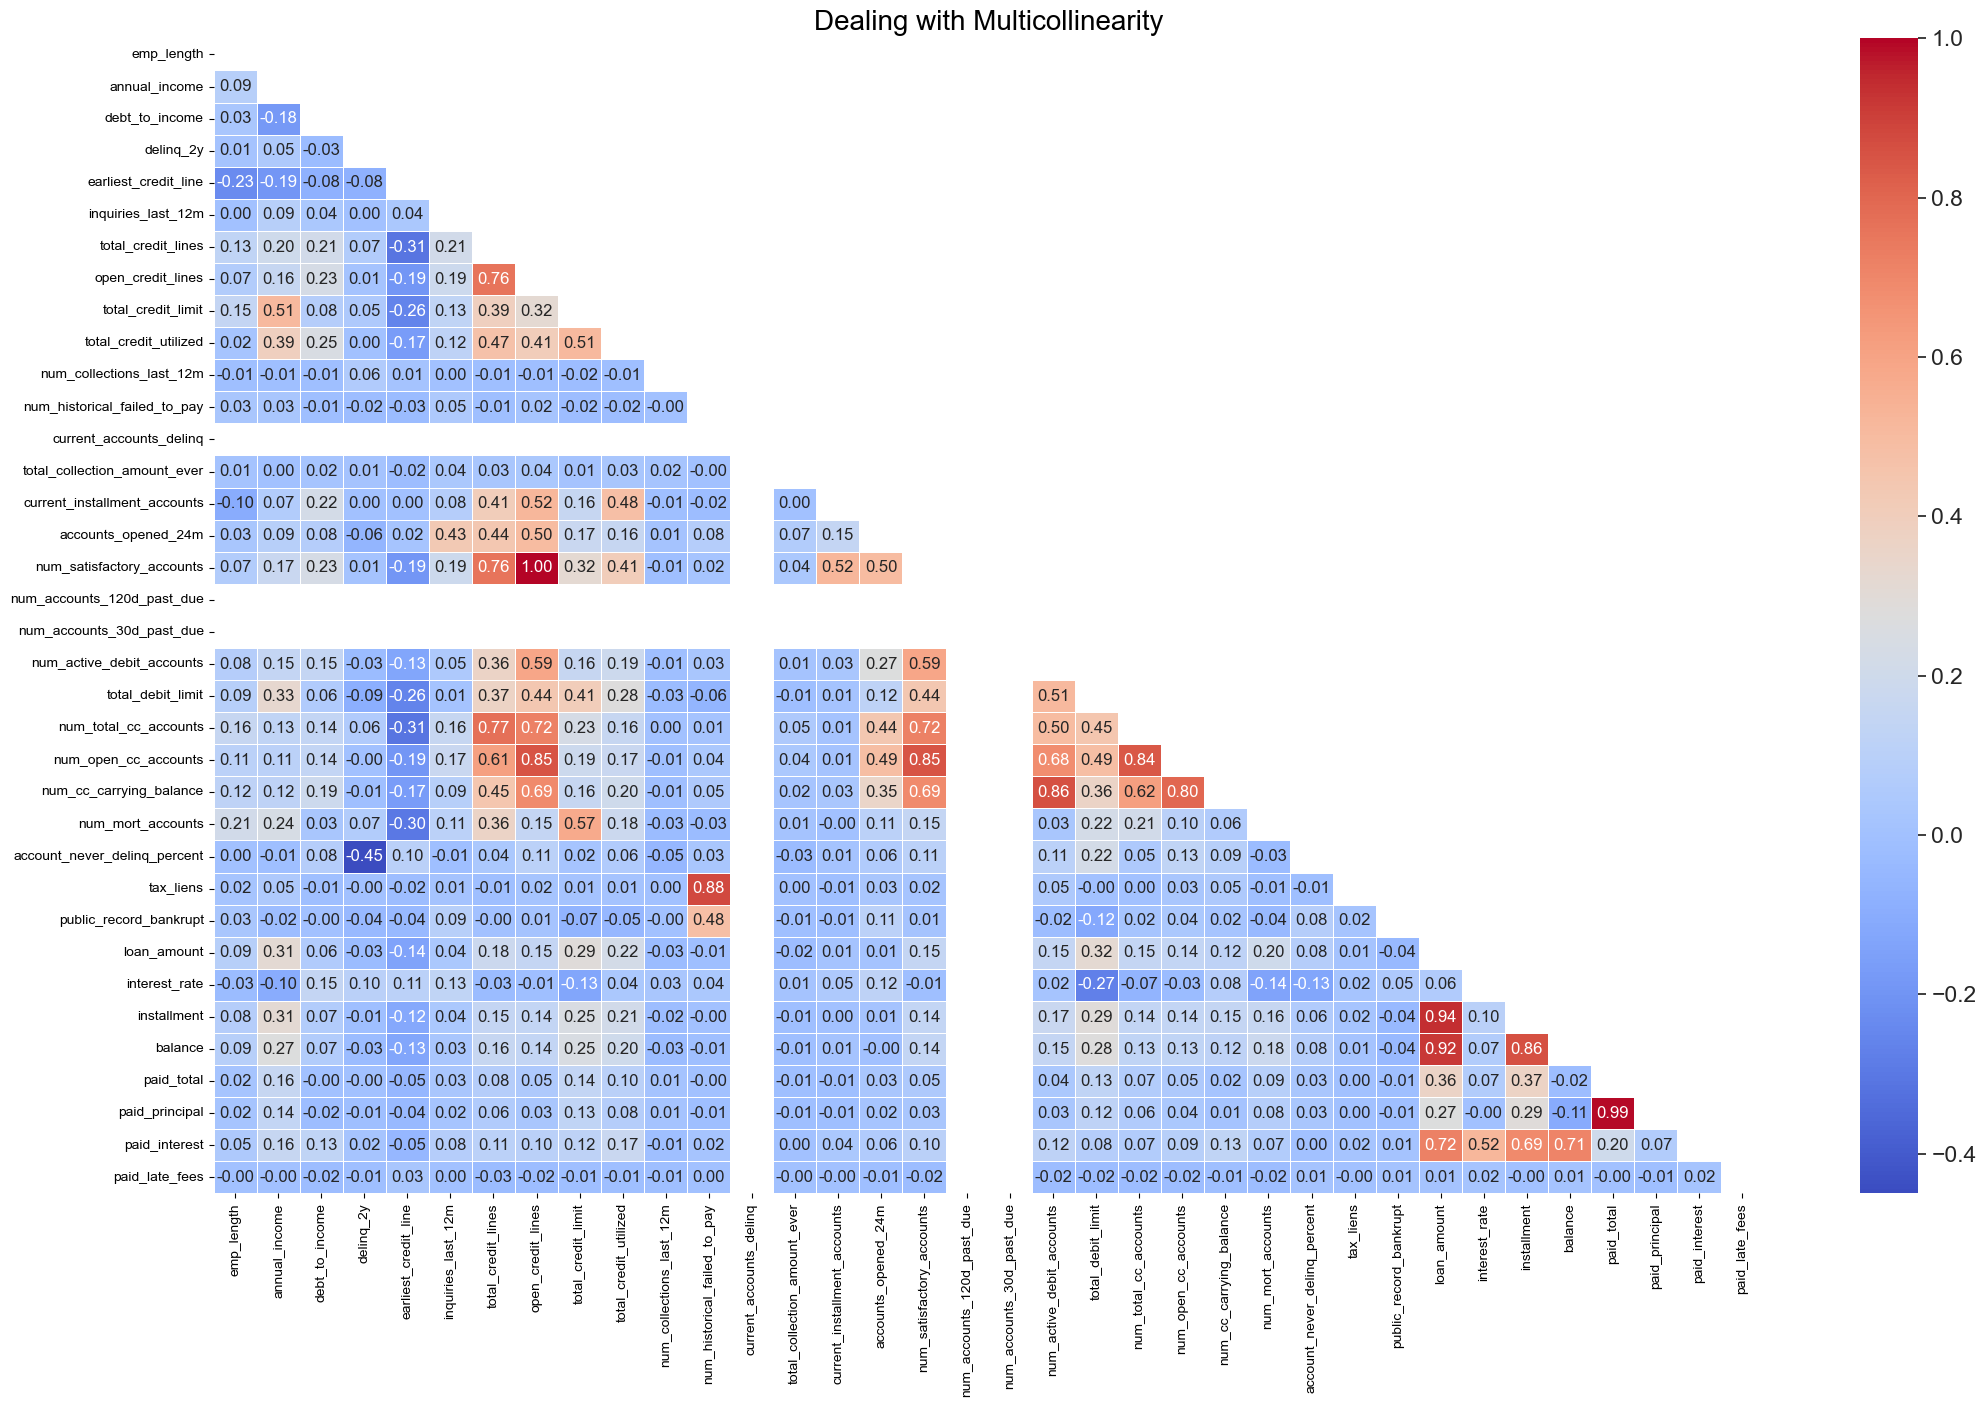

In [47]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [48]:
loan_data.num_accounts_30d_past_due.value_counts()

num_accounts_30d_past_due
0    8886
Name: count, dtype: int64

In [49]:
loan_data.drop(columns=['num_accounts_30d_past_due','num_accounts_120d_past_due','current_accounts_delinq'],inplace= True)

In [50]:
num = loan_data.select_dtypes(include="number")

In [51]:
num_corr = round(num.corr(), 2)
num_corr

emp_length  annual_income  debt_to_income  \
emp_length                          1.00           0.09            0.03   
annual_income                       0.09           1.00           -0.18   
debt_to_income                      0.03          -0.18            1.00   
delinq_2y                           0.01           0.05           -0.03   
earliest_credit_line               -0.23          -0.19           -0.08   
inquiries_last_12m                  0.00           0.09            0.04   
total_credit_lines                  0.13           0.20            0.21   
open_credit_lines                   0.07           0.16            0.23   
total_credit_limit                  0.15           0.51            0.08   
total_credit_utilized               0.02           0.39            0.25   
num_collections_last_12m           -0.01          -0.01           -0.01   
num_historical_failed_to_pay        0.03           0.03           -0.01   
total_collection_amount_ever        0.01           0.00            0.02   
current_installment_accounts       -0.10           0.07            0.22   
accounts_opened_24m                 0.03           0.09            0.08   
num_satisfactory_accounts           0.07           0.17            0.23   
num_active_debit_accounts           0.08           0.15            0.15   
total_debit_limit                   0.09           0.33            0.06   
num_total_cc_accounts               0.16           0.13            0.14   
num_open_cc_accounts                0.11           0.11            0.14   
num_cc_carrying_balance             0.12           0.12            0.19   
num_mort_accounts                   0.21           0.24            0.03   
account_never_delinq_percent        0.00          -0.01            0.08   
tax_liens                           0.02           0.05           -0.01   
public_record_bankrupt              0.03          -0.02           -0.00   
loan_amount                         0.09           0.31            0.06   
interest_rate                      -0.03          -0.10            0.15   
installment                         0.08           0.31            0.07   
balance                             0.09           0.27            0.07   
paid_total                          0.02           0.16           -0.00   
paid_principal                      0.02           0.14           -0.02   
paid_interest                       0.05           0.16            0.13   
paid_late_fees                     -0.00          -0.00           -0.02   

                              delinq_2y  earliest_credit_line  \
emp_length                         0.01                 -0.23   
annual_income                      0.05                 -0.19   
debt_to_income                    -0.03                 -0.08   
delinq_2y                          1.00                 -0.08   
earliest_credit_line              -0.08                  1.00   
inquiries_last_12m                 0.00                  0.04   
total_credit_lines                 0.07                 -0.31   
open_credit_lines                  0.01                 -0.19   
total_credit_limit                 0.05                 -0.26   
total_credit_utilized              0.00                 -0.17   
num_collections_last_12m           0.06                  0.01   
num_historical_failed_to_pay      -0.02                 -0.03   
total_collection_amount_ever       0.01                 -0.02   
current_installment_accounts       0.00                  0.00   
accounts_opened_24m               -0.06                  0.02   
num_satisfactory_accounts          0.01                 -0.19   
num_active_debit_accounts         -0.03                 -0.13   
total_debit_limit                 -0.09                 -0.26   
num_total_cc_accounts              0.06                 -0.31   
num_open_cc_accounts              -0.00                 -0.19   
num_cc_carrying_balance           -0.01                 -0.17   
num_mort_accounts                  0.07          

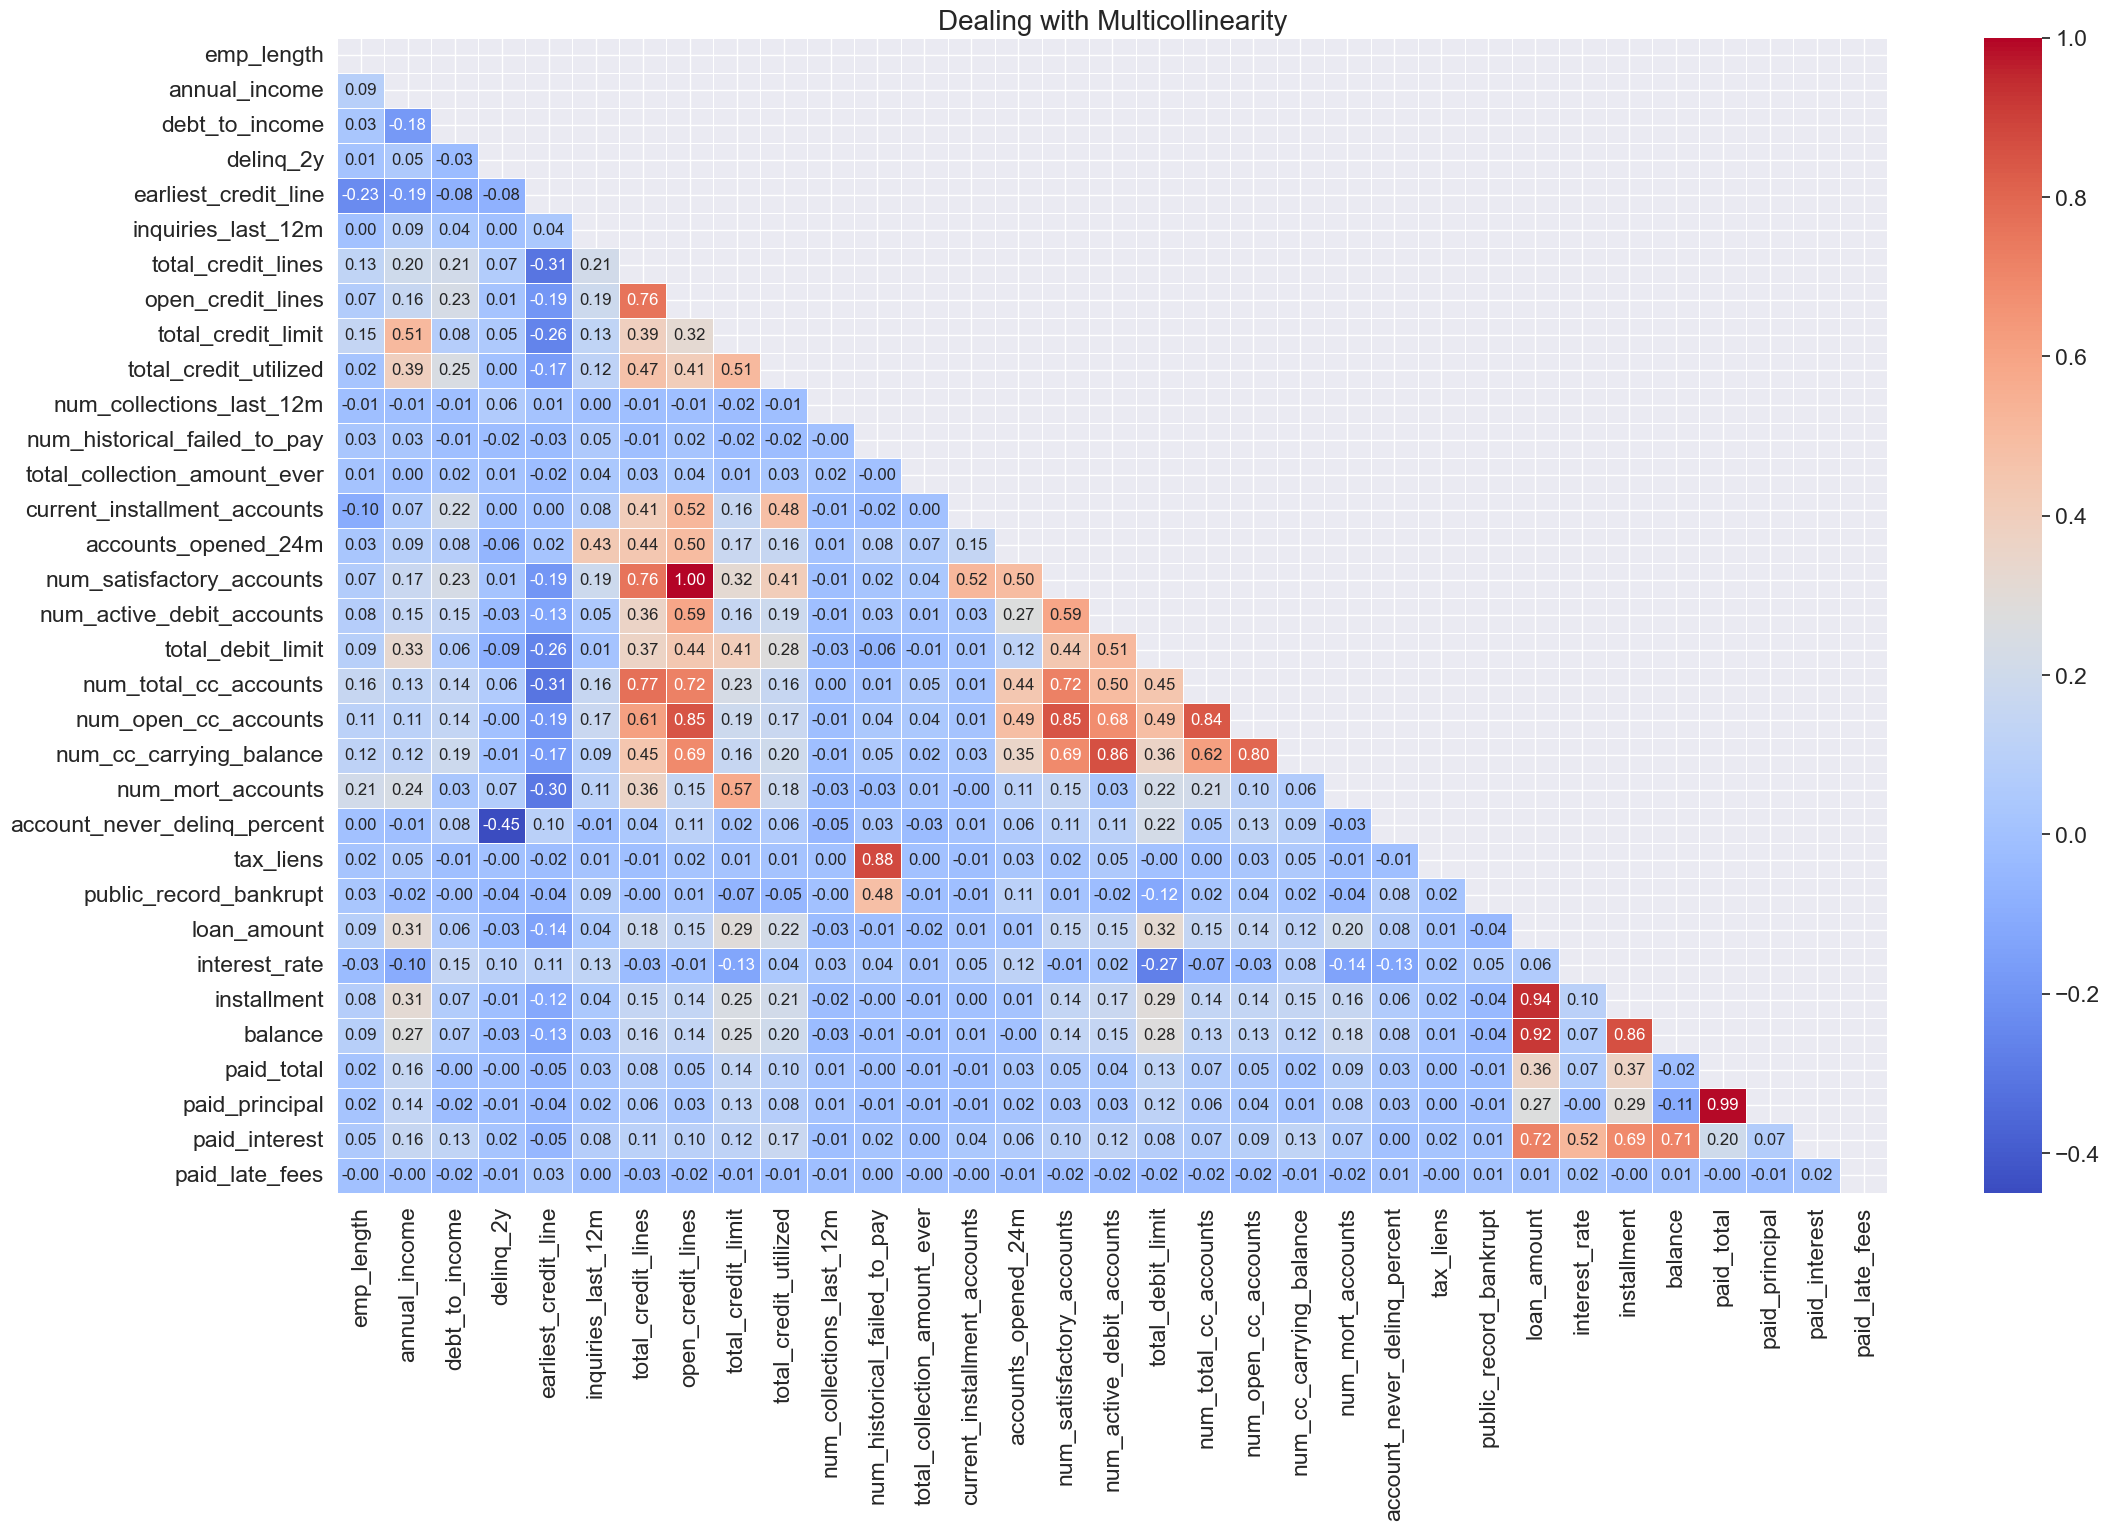

In [52]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [53]:
columns_to_drop = [
    'paid_principal',
    'num_satisfactory_accounts',
    'num_total_cc_accounts',
    'installment'
]

loan_data.drop(columns=columns_to_drop, inplace=True)

In [54]:
num = loan_data.select_dtypes(include="number")

In [55]:
num_corr = round(num.corr(), 2)
num_corr

emp_length  annual_income  debt_to_income  \
emp_length                          1.00           0.09            0.03   
annual_income                       0.09           1.00           -0.18   
debt_to_income                      0.03          -0.18            1.00   
delinq_2y                           0.01           0.05           -0.03   
earliest_credit_line               -0.23          -0.19           -0.08   
inquiries_last_12m                  0.00           0.09            0.04   
total_credit_lines                  0.13           0.20            0.21   
open_credit_lines                   0.07           0.16            0.23   
total_credit_limit                  0.15           0.51            0.08   
total_credit_utilized               0.02           0.39            0.25   
num_collections_last_12m           -0.01          -0.01           -0.01   
num_historical_failed_to_pay        0.03           0.03           -0.01   
total_collection_amount_ever        0.01           0.00            0.02   
current_installment_accounts       -0.10           0.07            0.22   
accounts_opened_24m                 0.03           0.09            0.08   
num_active_debit_accounts           0.08           0.15            0.15   
total_debit_limit                   0.09           0.33            0.06   
num_open_cc_accounts                0.11           0.11            0.14   
num_cc_carrying_balance             0.12           0.12            0.19   
num_mort_accounts                   0.21           0.24            0.03   
account_never_delinq_percent        0.00          -0.01            0.08   
tax_liens                           0.02           0.05           -0.01   
public_record_bankrupt              0.03          -0.02           -0.00   
loan_amount                         0.09           0.31            0.06   
interest_rate                      -0.03          -0.10            0.15   
balance                             0.09           0.27            0.07   
paid_total                          0.02           0.16           -0.00   
paid_interest                       0.05           0.16            0.13   
paid_late_fees                     -0.00          -0.00           -0.02   

                              delinq_2y  earliest_credit_line  \
emp_length                         0.01                 -0.23   
annual_income                      0.05                 -0.19   
debt_to_income                    -0.03                 -0.08   
delinq_2y                          1.00                 -0.08   
earliest_credit_line              -0.08                  1.00   
inquiries_last_12m                 0.00                  0.04   
total_credit_lines                 0.07                 -0.31   
open_credit_lines                  0.01                 -0.19   
total_credit_limit                 0.05                 -0.26   
total_credit_utilized              0.00                 -0.17   
num_collections_last_12m           0.06                  0.01   
num_historical_failed_to_pay      -0.02                 -0.03   
total_collection_amount_ever       0.01                 -0.02   
current_installment_accounts       0.00                  0.00   
accounts_opened_24m               -0.06                  0.02   
num_active_debit_accounts         -0.03                 -0.13   
total_debit_limit                 -0.09                 -0.26   
num_open_cc_accounts              -0.00                 -0.19   
num_cc_carrying_balance           -0.01                 -0.17   
num_mort_accounts                  0.07                 -0.30   
account_never_delinq_percent      -0.45                  0.10   
tax_liens                         -0.00                 -0.02   
public_record_bankrupt            -0.04                 -0.04   
loan_amount                       -0.03                 -0.14   
interest_rate                      0.10                  0.11   
balance                           -0.03                 -0.13   
paid_total              

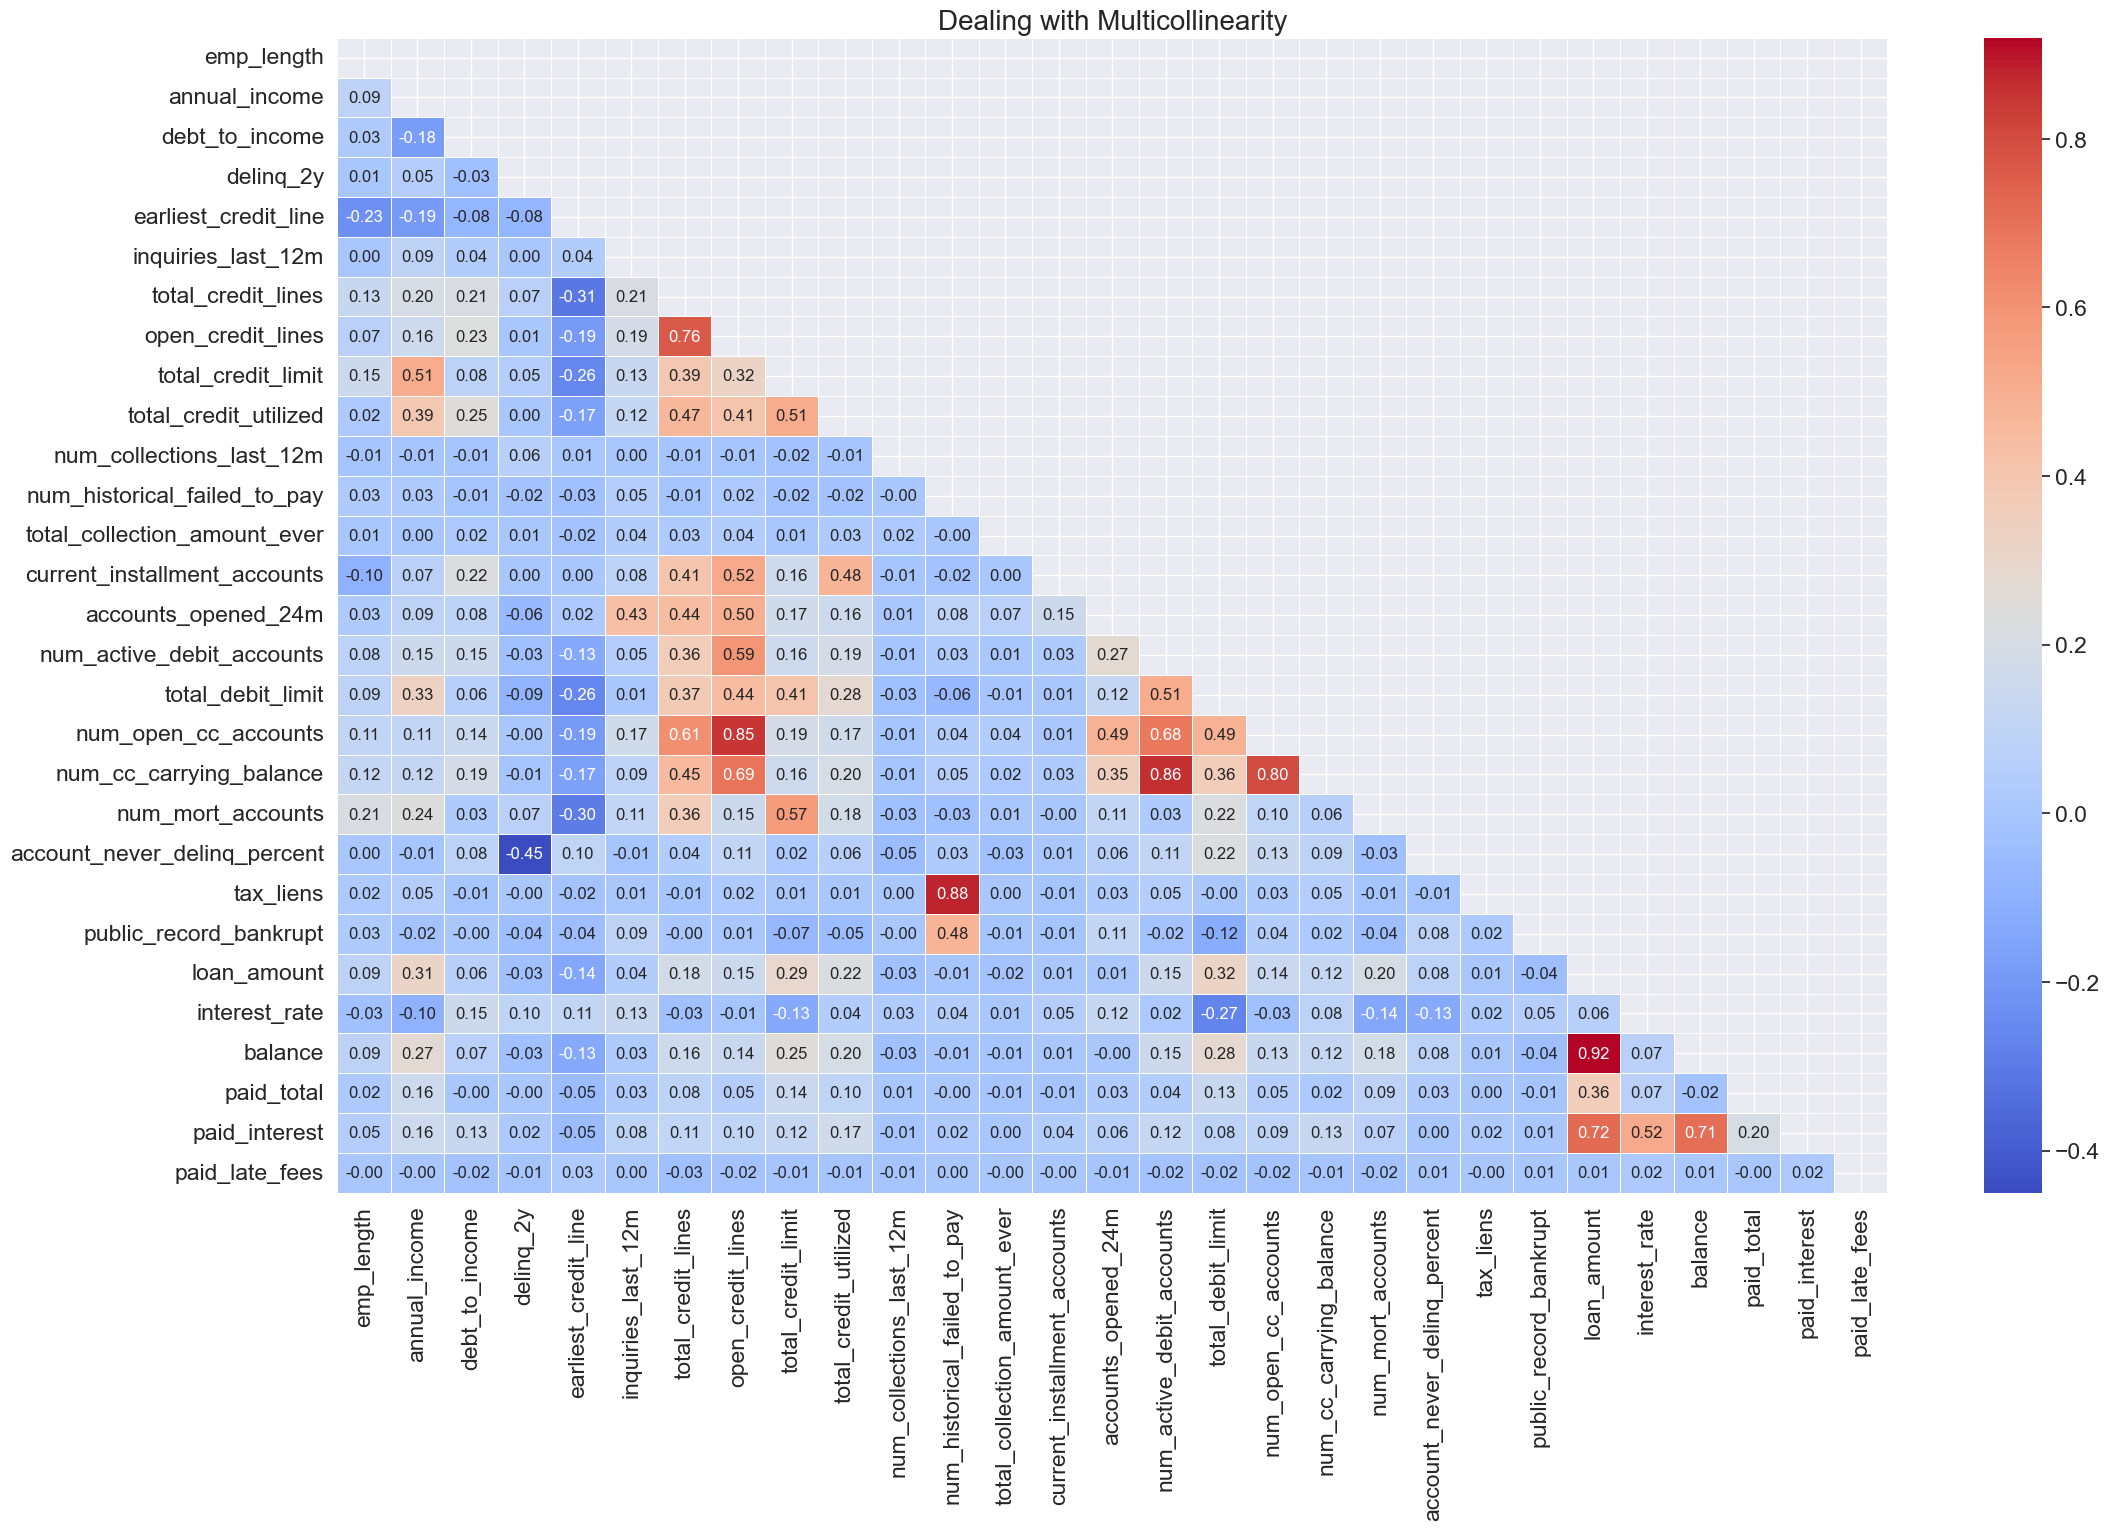

In [56]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [57]:
columns_to_drop2 = [
    'paid_total',
    'num_open_cc_accounts',
    'tax_liens',
    'public_record_bankrupt',
    'num_collections_last_12m',
    'delinq_2y',
    'num_historical_failed_to_pay',
    'total_collection_amount_ever'
]

# Assuming df is your DataFrame
loan_data.drop(columns=columns_to_drop2, inplace=True)

In [58]:
num = loan_data.select_dtypes(include="number")

In [59]:
num_corr = round(num.corr(), 2)
num_corr


emp_length  annual_income  debt_to_income  \
emp_length                          1.00           0.09            0.03   
annual_income                       0.09           1.00           -0.18   
debt_to_income                      0.03          -0.18            1.00   
earliest_credit_line               -0.23          -0.19           -0.08   
inquiries_last_12m                  0.00           0.09            0.04   
total_credit_lines                  0.13           0.20            0.21   
open_credit_lines                   0.07           0.16            0.23   
total_credit_limit                  0.15           0.51            0.08   
total_credit_utilized               0.02           0.39            0.25   
current_installment_accounts       -0.10           0.07            0.22   
accounts_opened_24m                 0.03           0.09            0.08   
num_active_debit_accounts           0.08           0.15            0.15   
total_debit_limit                   0.09           0.33            0.06   
num_cc_carrying_balance             0.12           0.12            0.19   
num_mort_accounts                   0.21           0.24            0.03   
account_never_delinq_percent        0.00          -0.01            0.08   
loan_amount                         0.09           0.31            0.06   
interest_rate                      -0.03          -0.10            0.15   
balance                             0.09           0.27            0.07   
paid_interest                       0.05           0.16            0.13   
paid_late_fees                     -0.00          -0.00           -0.02   

                              earliest_credit_line  inquiries_last_12m  \
emp_length                                   -0.23                0.00   
annual_income                                -0.19                0.09   
debt_to_income                               -0.08                0.04   
earliest_credit_line                          1.00                0.04   
inquiries_last_12m                            0.04                1.00   
total_credit_lines                           -0.31                0.21   
open_credit_lines                            -0.19                0.19   
total_credit_limit                           -0.26                0.13   
total_credit_utilized                        -0.17                0.12   
current_installment_accounts                  0.00                0.08   
accounts_opened_24m                           0.02                0.43   
num_active_debit_accounts                    -0.13                0.05   
total_debit_limit                            -0.26                0.01   
num_cc_carrying_balance                      -0.17                0.09   
num_mort_accounts                            -0.30                0.11   
account_never_delinq_percent                  0.10               -0.01   
loan_amount                                  -0.14                0.04   
interest_rate                                 0.11                0.13   
balance                                      -0.13                0.03   
paid_interest                                -0.05                0.08   
paid_late_fees                                0.03                0.00   

                              total_credit_lines  open_credit_lines  \
emp_length                                  0.13               0.07   
annual_income                               0.20               0.16   
debt_to_income                              0.21               0.23   
earliest_credit_line                       -0.31              -0.19   
inquiries_last_12m                          0.21               0.19   
total_credit_lines                          1.00               0.76   
open_credit_lines                           0.76               1.00   
total_credit_limit                          0.39               0.32   
total_credit_utilized                       0.47               0.41   
current_installment_accounts            

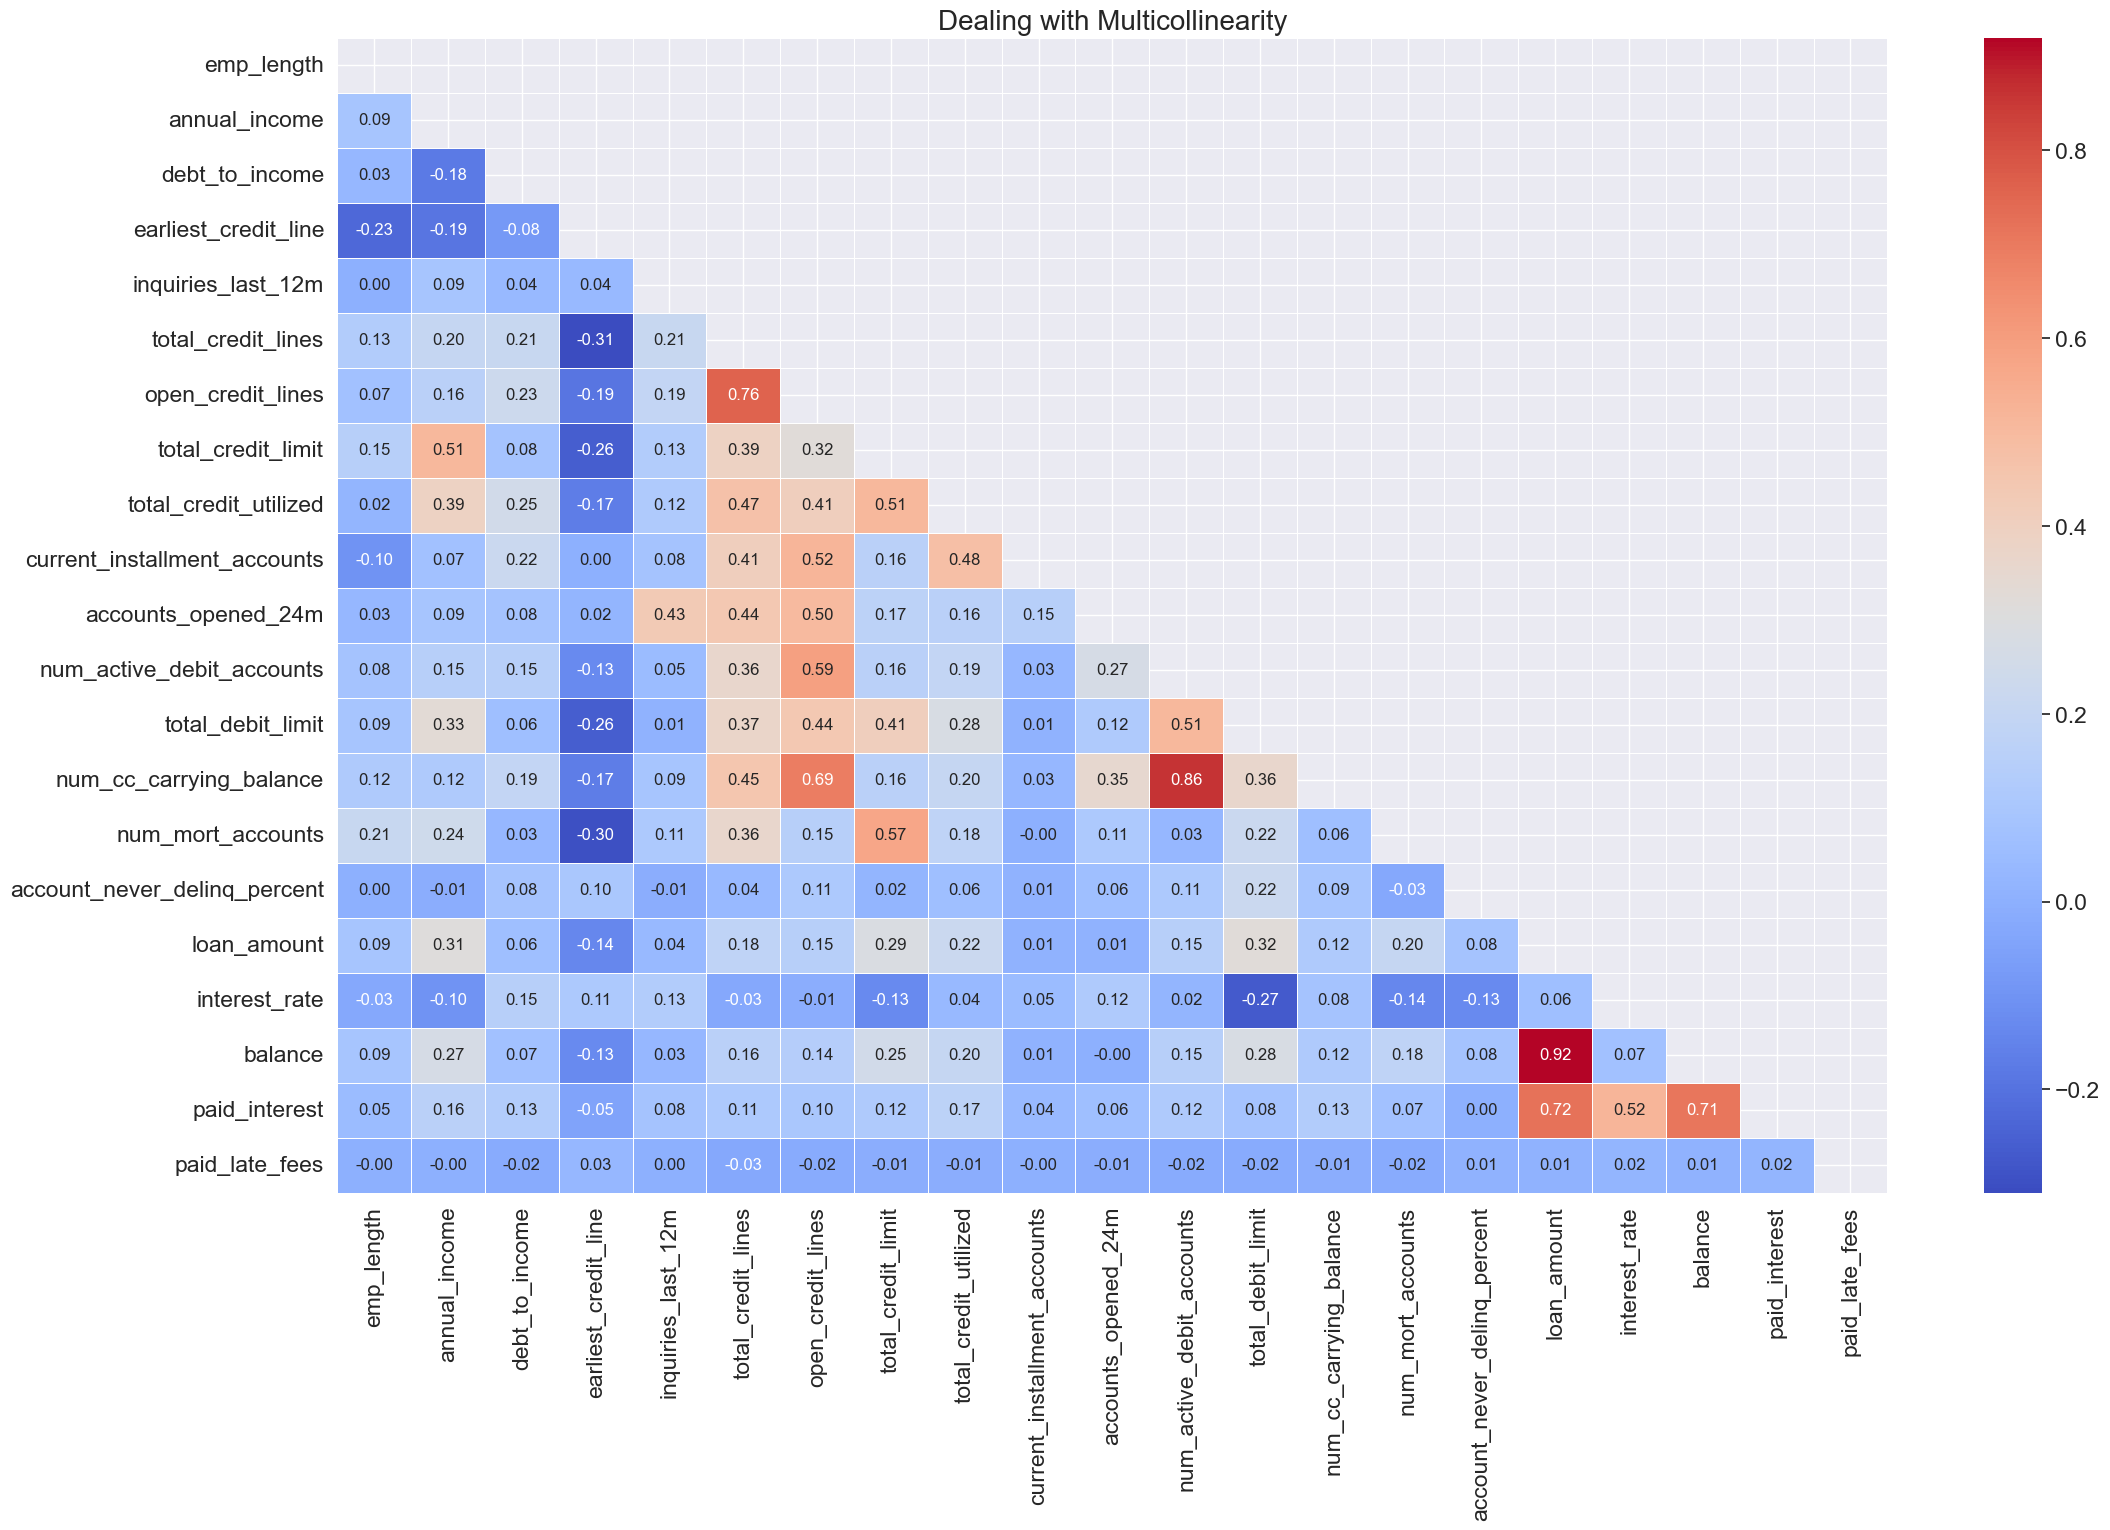

In [60]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [61]:
columns_to_drop3 = [
'balance','num_active_debit_accounts'
]

# Assuming df is your DataFrame
loan_data.drop(columns=columns_to_drop3, inplace=True)

In [62]:
num = loan_data.select_dtypes(include="number")

In [63]:
num_corr = round(num.corr(), 2)

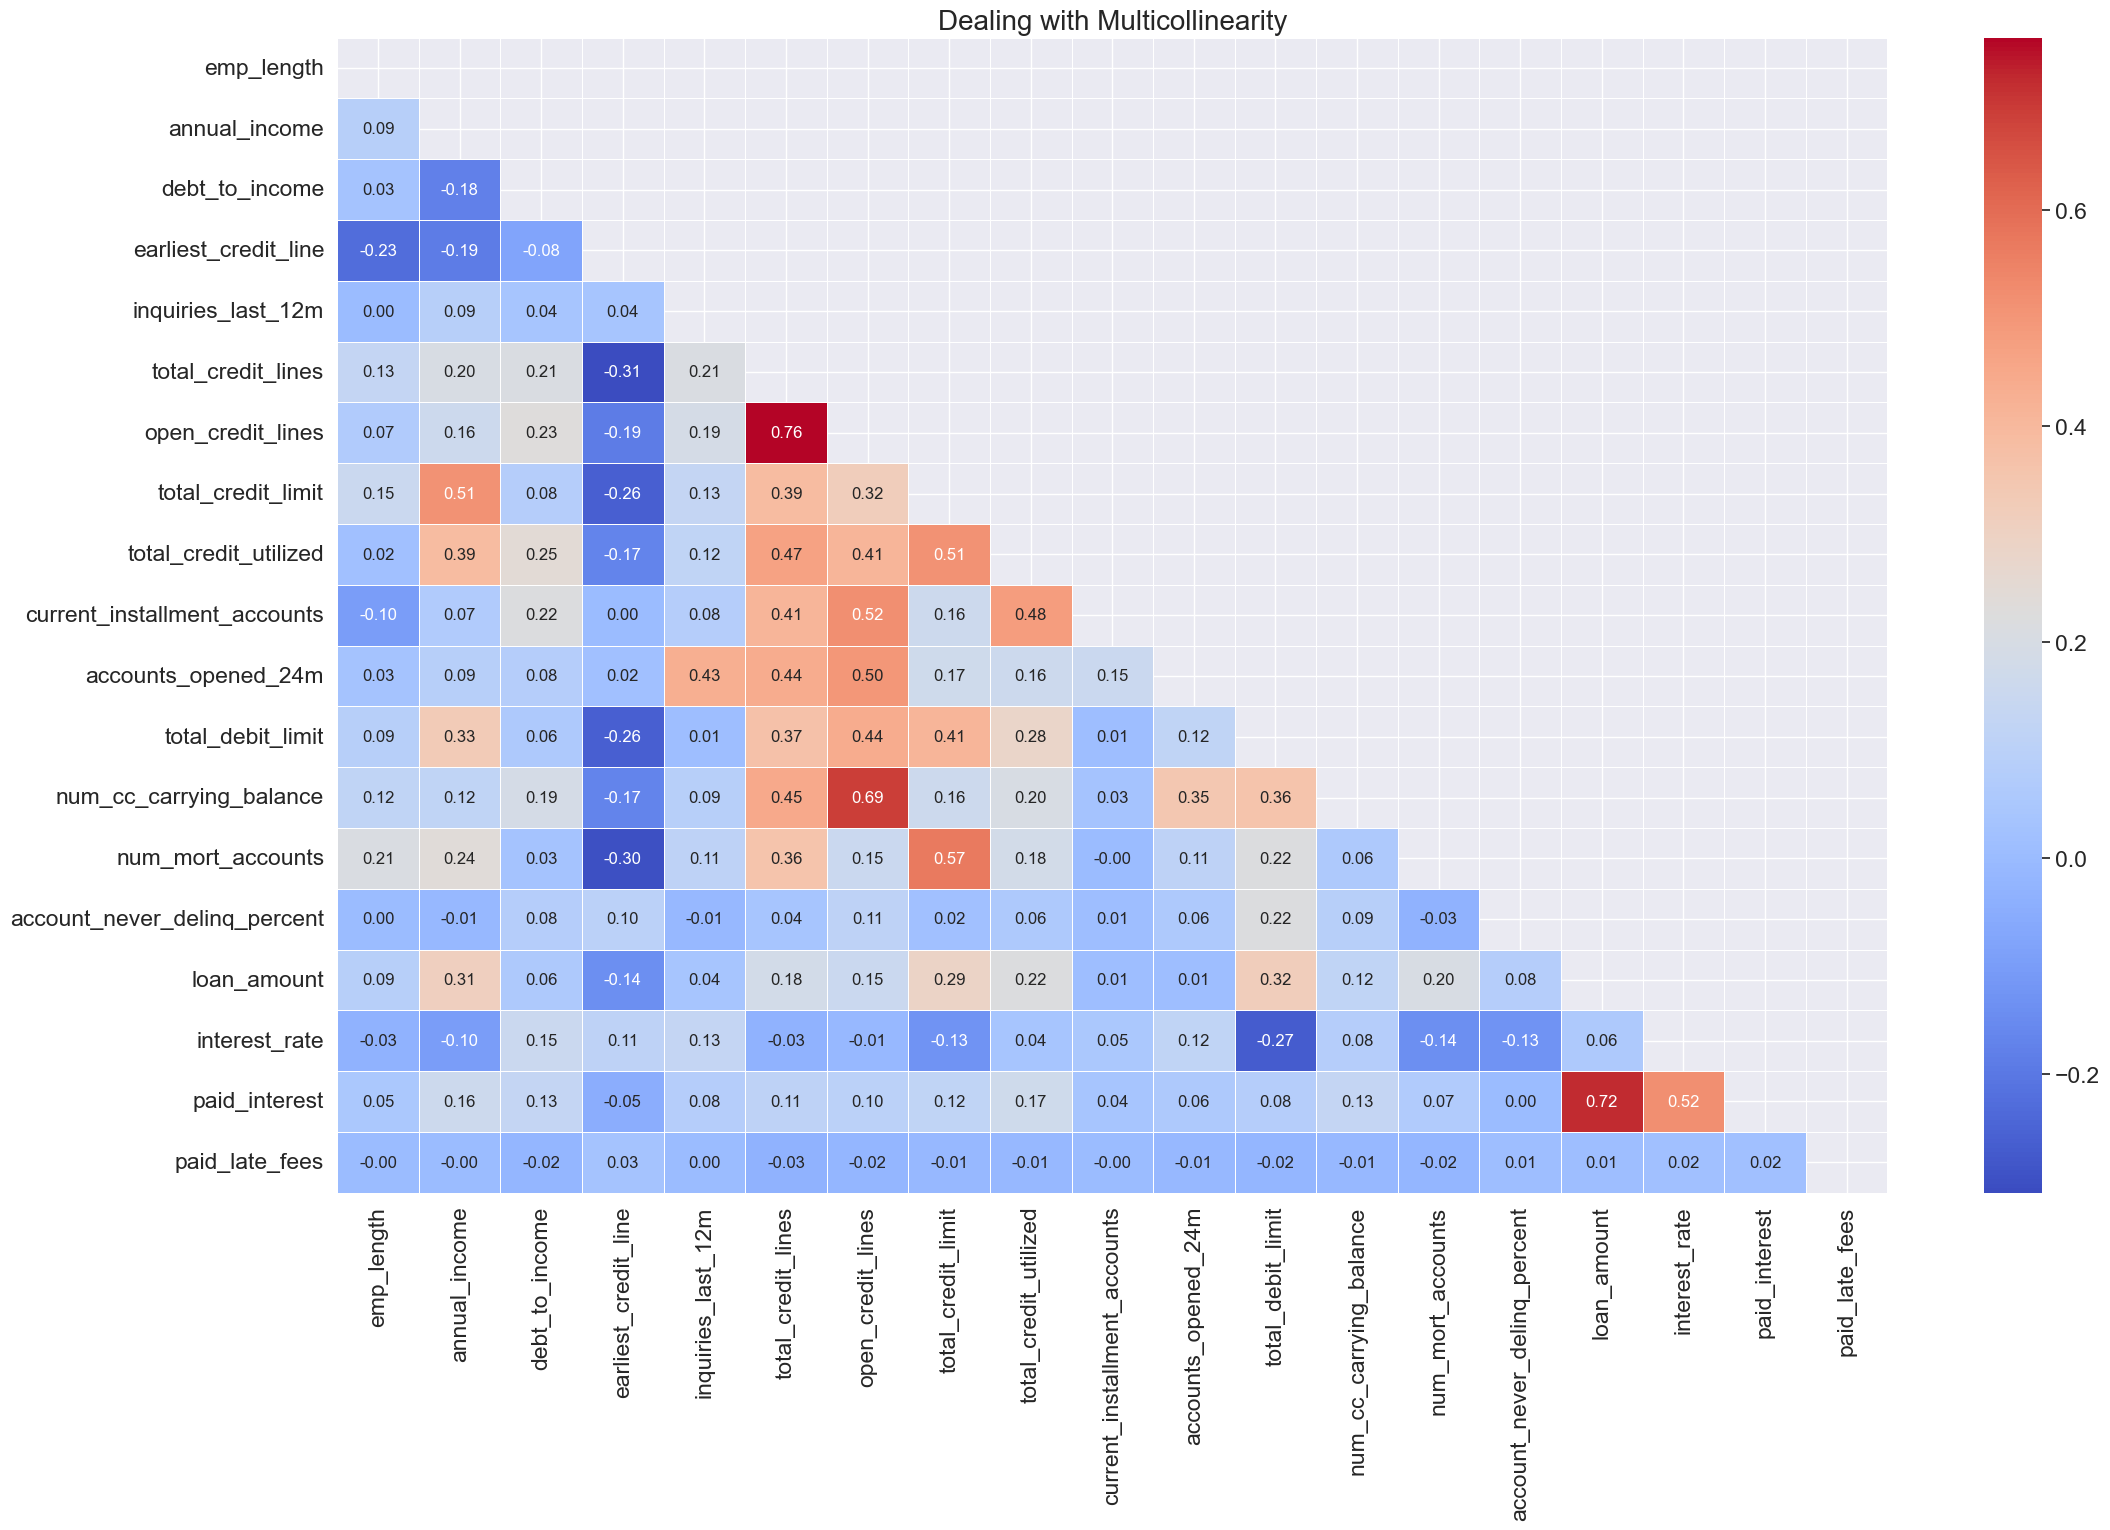

In [64]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [65]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   emp_length                    8886 non-null   float64
 1   state                         8886 non-null   object 
 2   homeownership                 8886 non-null   object 
 3   annual_income                 8886 non-null   float64
 4   verified_income               8886 non-null   bool   
 5   debt_to_income                8886 non-null   float64
 6   earliest_credit_line          8886 non-null   int64  
 7   inquiries_last_12m            8886 non-null   int64  
 8   total_credit_lines            8886 non-null   int64  
 9   open_credit_lines             8886 non-null   int64  
 10  total_credit_limit            8886 non-null   int64  
 11  total_credit_utilized         8886 non-null   int64  
 12  current_installment_accounts  8886 non-null   int64  
 13  accounts

In [66]:
loan_data.loan_purpose.value_counts()

loan_purpose
debt_consolidation    4543
credit_card           2007
other                  814
home_improvement       612
major_purchase         280
house                  138
medical                133
small_business         115
car                    114
moving                  67
vacation                53
renewable_energy        10
Name: count, dtype: int64

In [67]:
loan_data.shape

(8886, 29)

In [68]:
loan_data.describe().T

count           mean            std      min  \
emp_length                    8886.0       5.919761       3.702070     0.00   
annual_income                 8886.0   81813.401502   66237.569076  3000.00   
debt_to_income                8886.0      18.916206      14.354924     0.00   
earliest_credit_line          8886.0    2001.712019       7.424412  1963.00   
inquiries_last_12m            8886.0       1.983232       2.408915     0.00   
total_credit_lines            8886.0      22.835472      11.965019     2.00   
open_credit_lines             8886.0      11.482219       5.896258     0.00   
total_credit_limit            8886.0  187573.904006  189073.426338     0.00   
total_credit_utilized         8886.0   52594.281792   54745.741823     0.00   
current_installment_accounts  8886.0       2.790457       3.023000     0.00   
accounts_opened_24m           8886.0       4.404907       3.167597     0.00   
total_debit_limit             8886.0   27513.144272   26303.543168     0.00   
num_cc_carrying_balance       8886.0       5.163403       3.296709     0.00   
num_mort_accounts             8886.0       1.382512       1.711520     0.00   
account_never_delinq_percent  8886.0      94.673183       9.221837    14.30   
loan_amount                   8886.0   16568.506640   10362.566414  1000.00   
interest_rate                 8886.0      12.359656       4.997616     5.31   
paid_interest                 8886.0     605.462119     520.655989     0.00   
paid_late_fees                8886.0       0.107645       1.767641     0.00   

                                     25%        50%          75%         max  
emp_length                        2.0000       6.00      10.0000       10.00  
annual_income                 48000.0000   68000.00   98000.0000  2300000.00  
debt_to_income                   10.8925      17.31      24.6700      469.09  
earliest_credit_line           1998.0000    2003.00    2007.0000     2015.00  
inquiries_last_12m                0.0000       1.00       3.0000       26.00  
total_credit_lines               14.0000      21.00      30.0000       87.00  
open_credit_lines                 7.0000      10.00      15.0000       51.00  
total_credit_limit            53635.5000  119894.00  271986.5000  3386034.00  
total_credit_utilized         20186.5000   38060.00   67108.5000   942456.00  
current_installment_accounts      1.0000       2.00       3.0000       35.00  
accounts_opened_24m               2.0000       4.00       6.0000       29.00  
total_debit_limit             10000.0000   19900.00   36475.0000   283600.00  
num_cc_carrying_balance           3.0000       5.00       7.0000       43.00  
num_mort_accounts                 0.0000       1.00       2.0000       14.00  
account_never_delinq_percent     92.7500     100.00     100.0000      100.00  
loan_amount                    8500.0000   15000.00   24000.0000    40000.00  
interest_rate                     7.9700      11.98      15.0500       30.79  
paid_interest                   223.8125     450.39     833.6725     4216.44  
paid_late_fees                    0.0000       0.00       0.0000       52.98

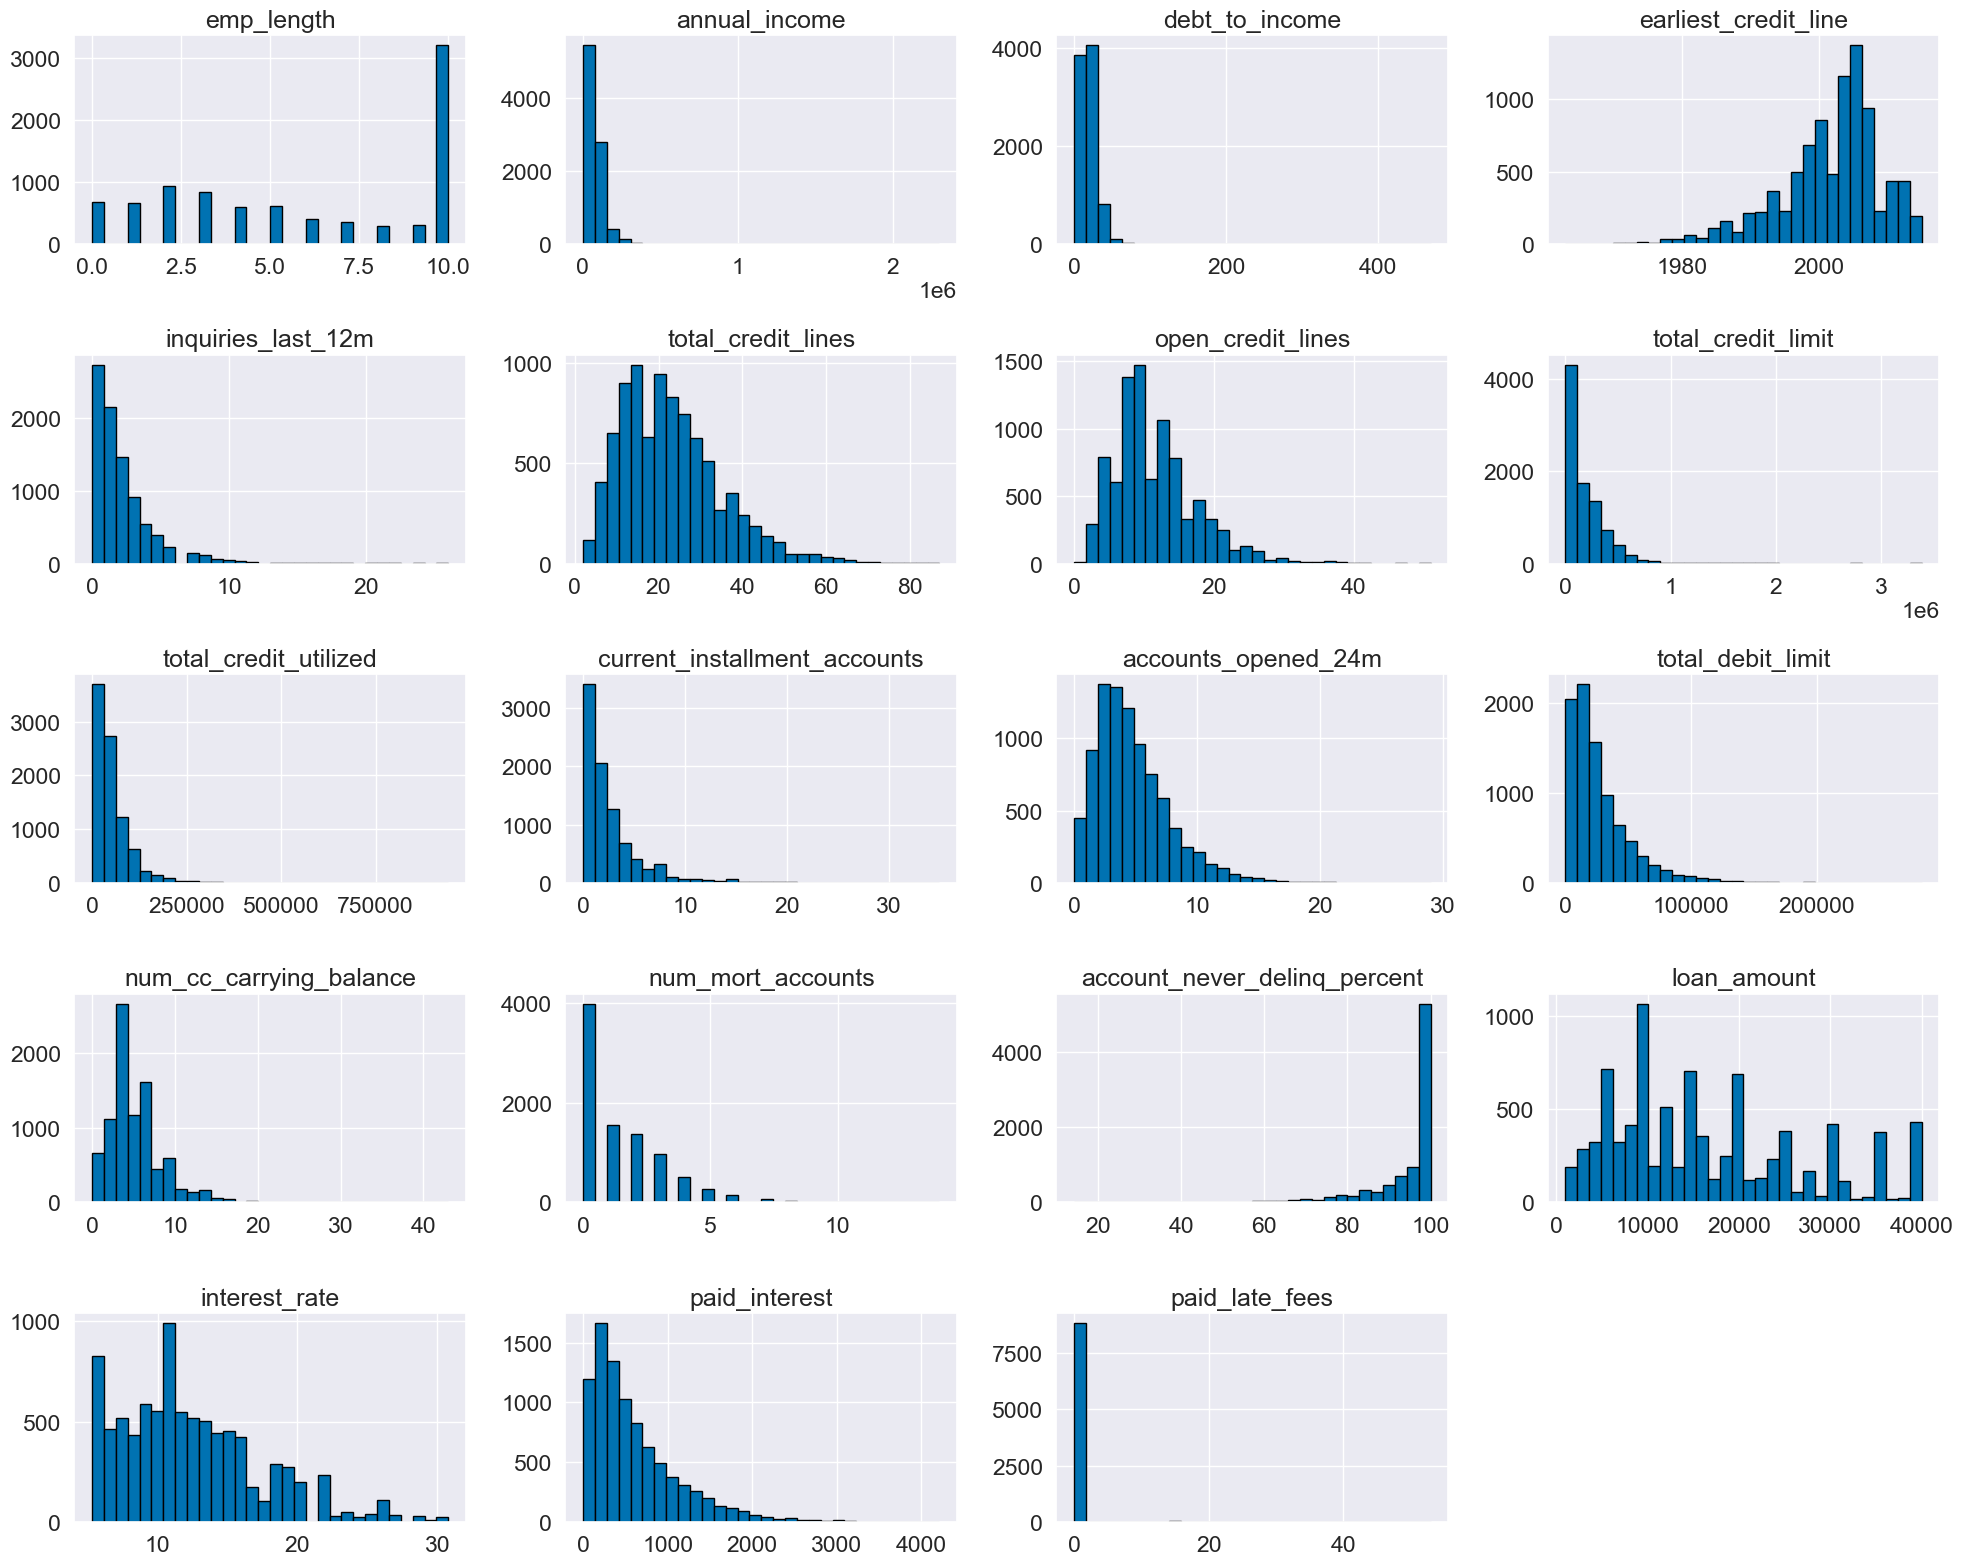

In [69]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

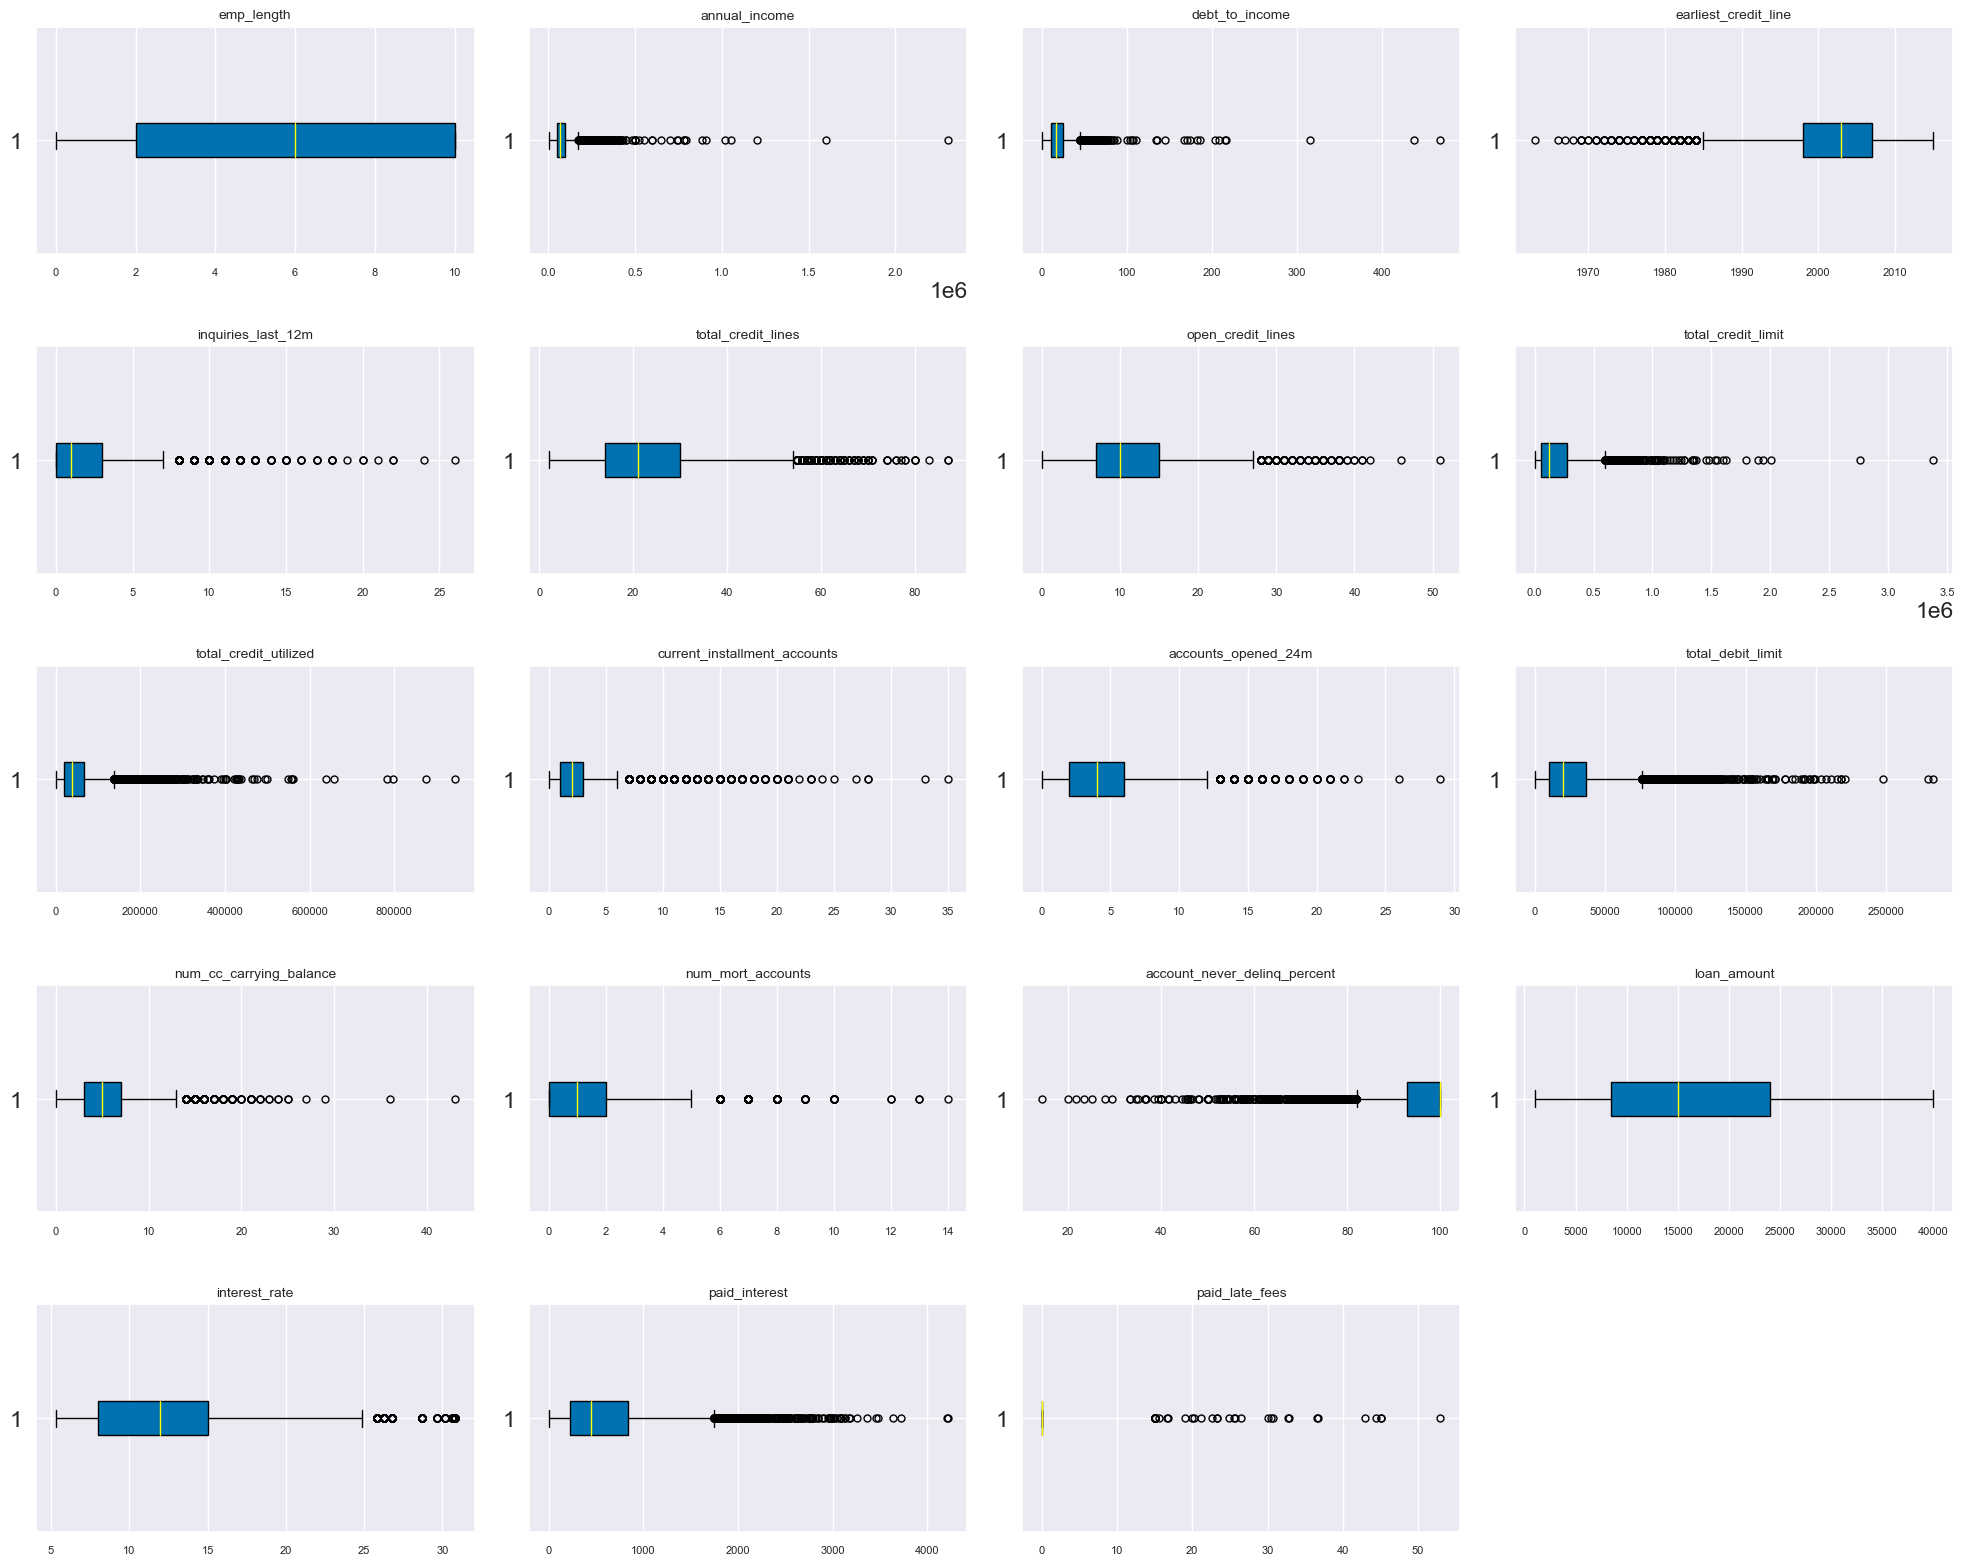

In [70]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [71]:
# without outliers: 
for column in num.select_dtypes(include=[np.number]):
        Q1 = num[column].quantile(0.25)
        Q3 = num[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        num = num[(num[column] >= lower_bound) & (num[column] <= upper_bound)]

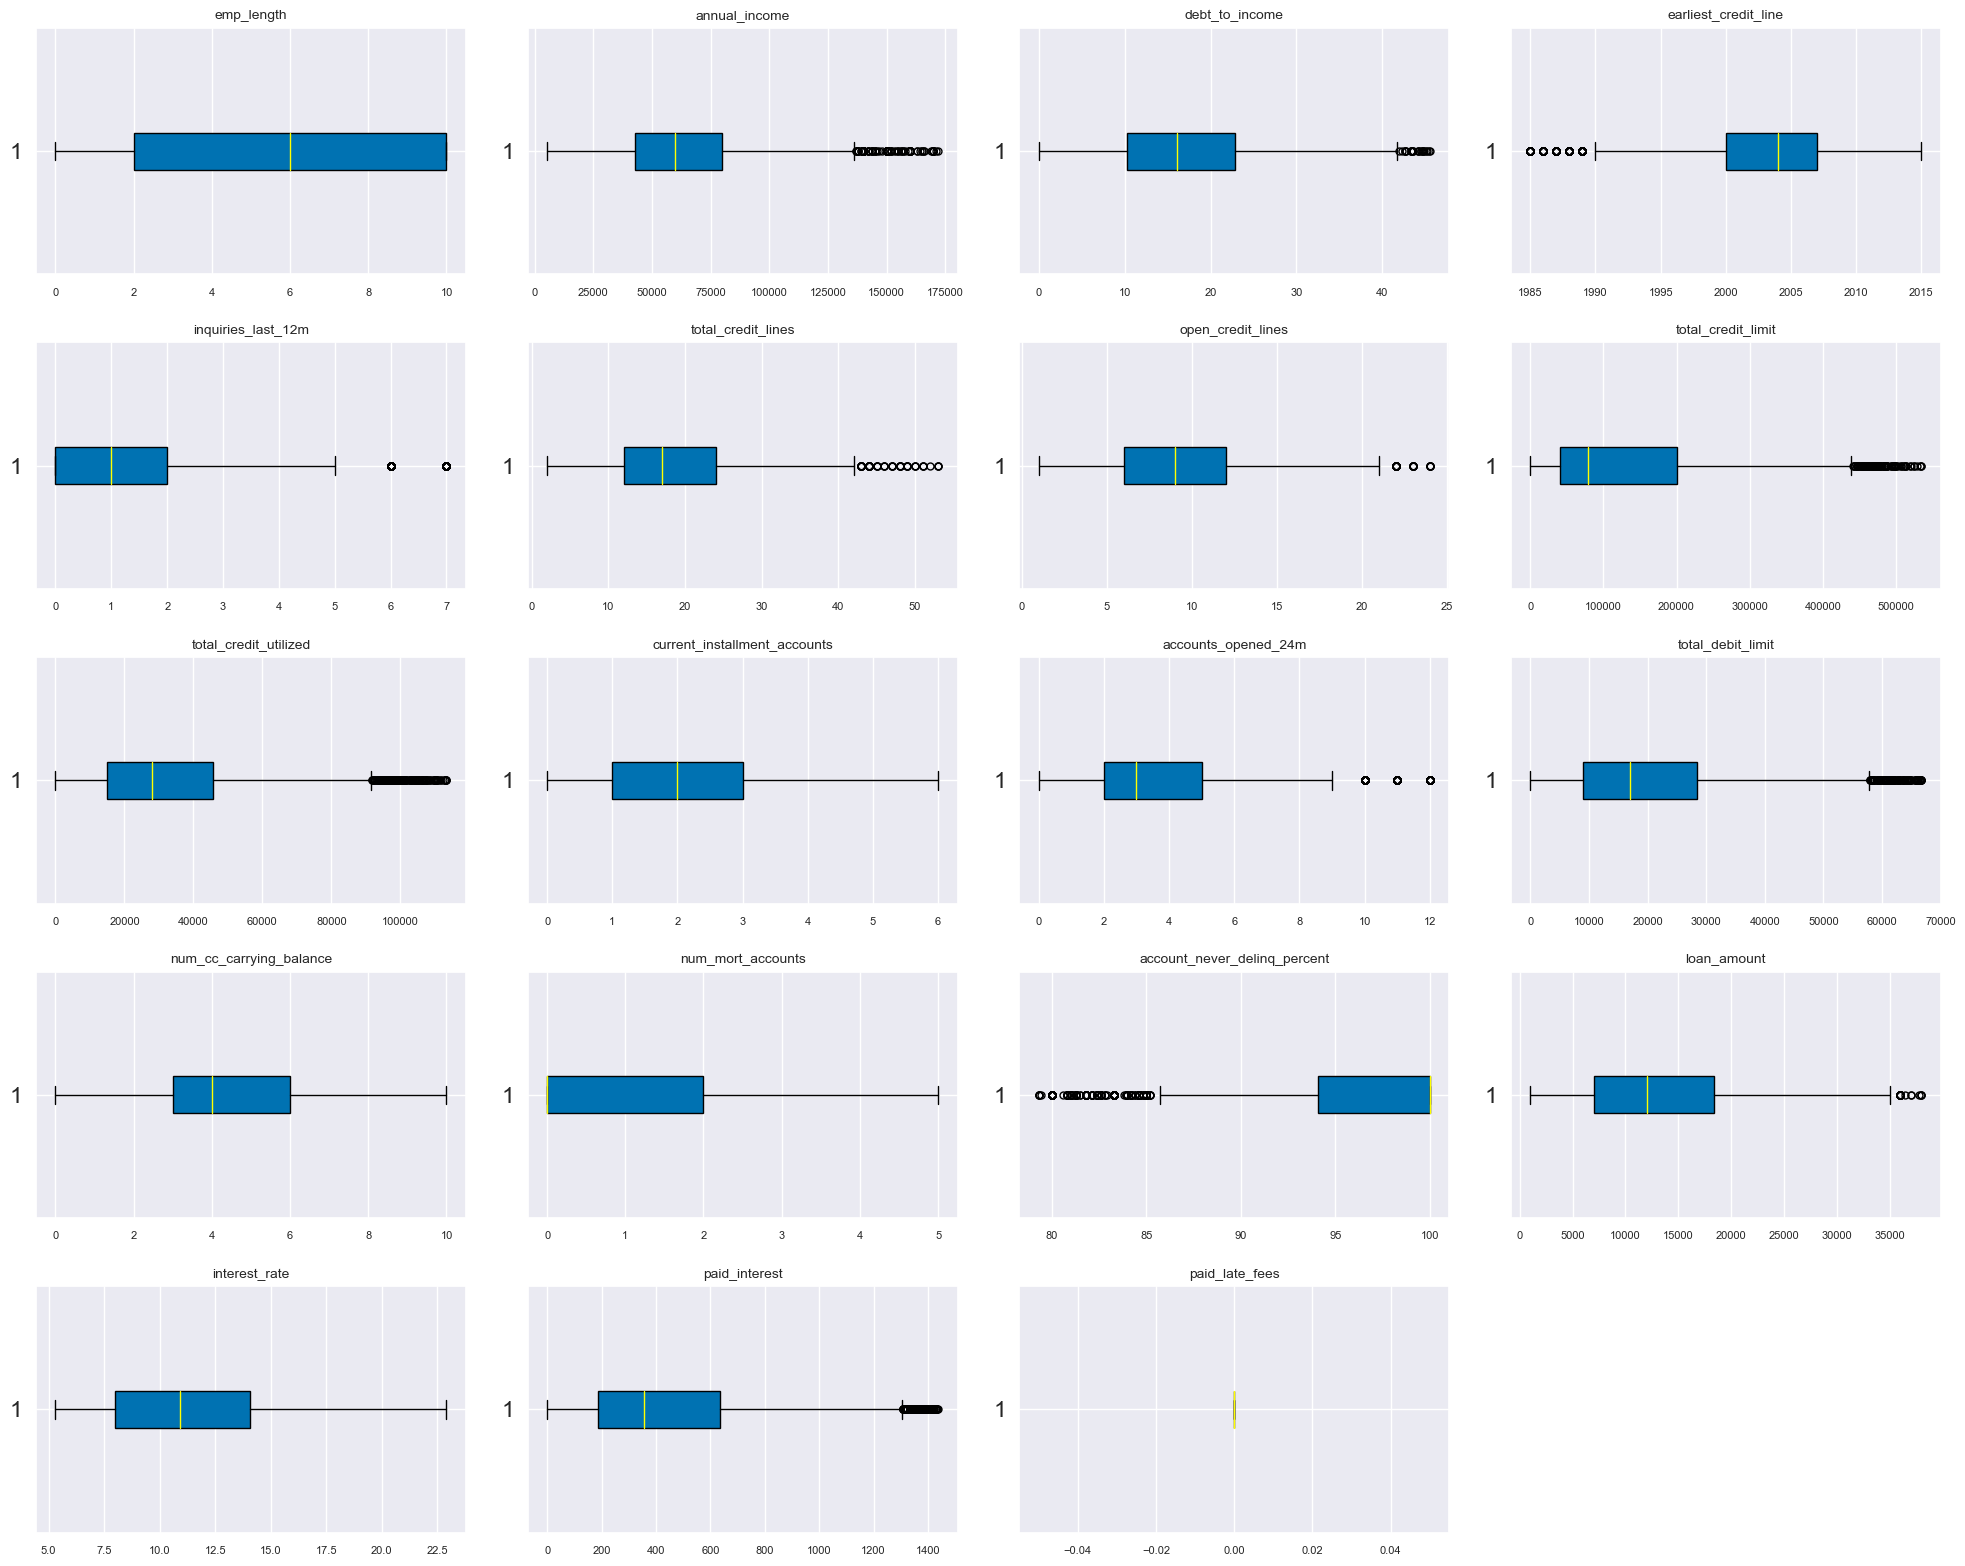

In [72]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

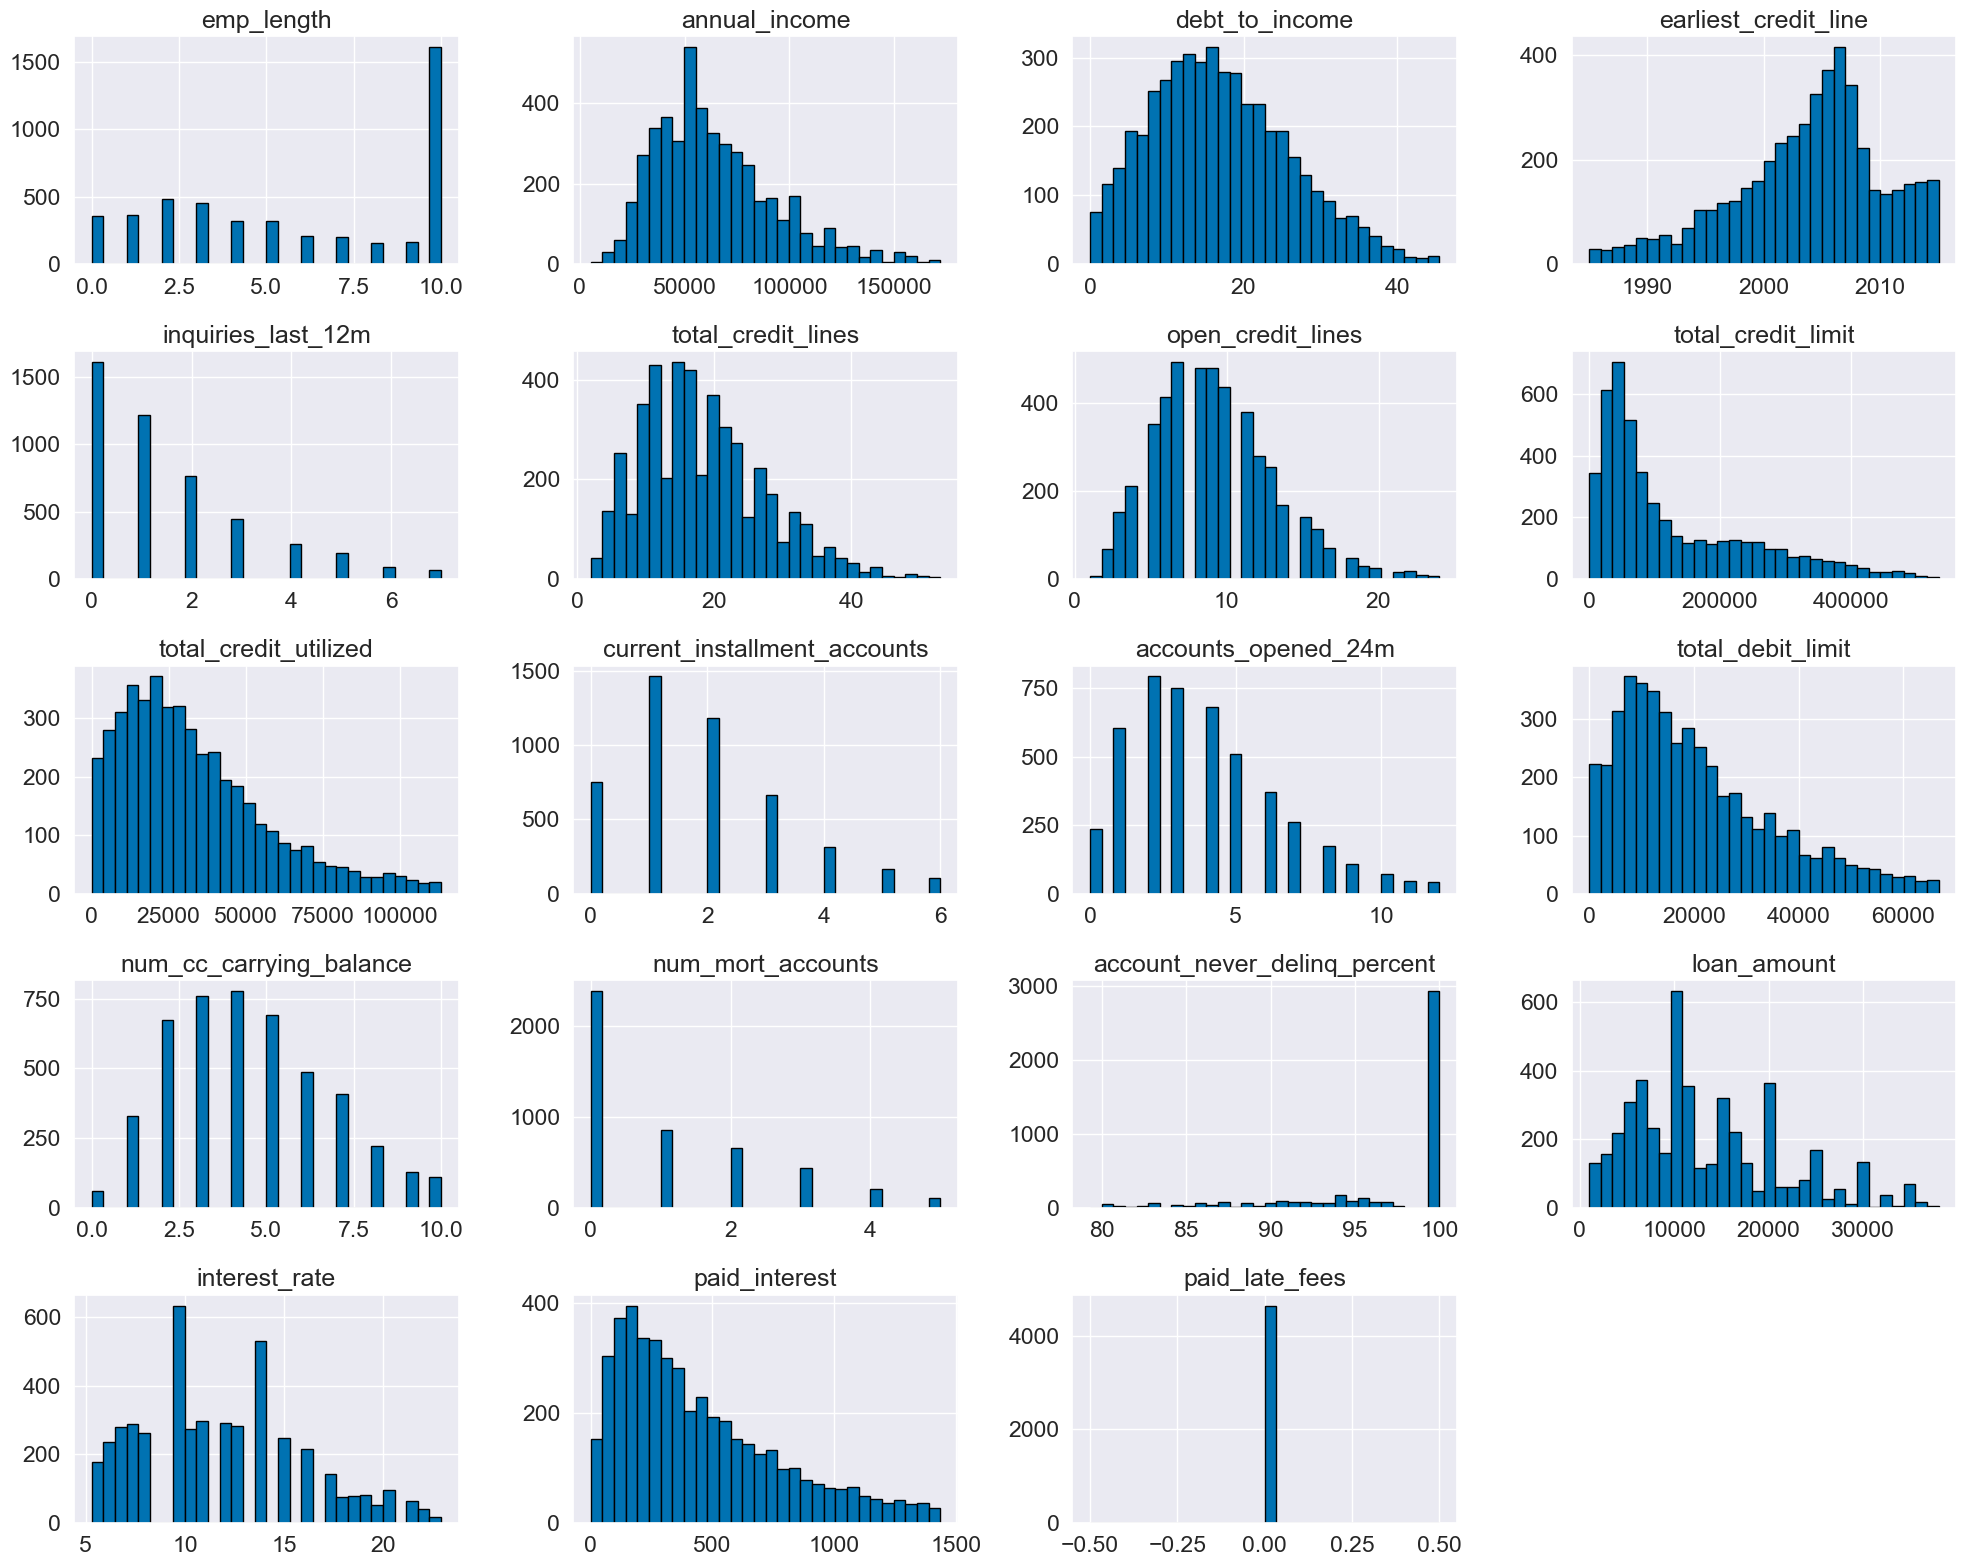

In [73]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

<Axes: xlabel='loan_amount', ylabel='Count'>

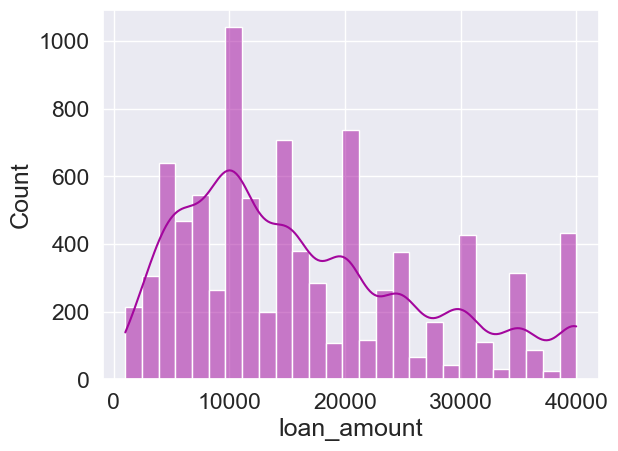

In [74]:
# loan_amount exploration:

sns.histplot(data=loan_data, x=loan_data["loan_amount"], kde=True, color="#A3069D")

In [75]:
loan_data.loan_amount.value_counts()

loan_amount
10000    869
20000    628
15000    510
12000    430
40000    420
        ... 
28775      1
20325      1
34200      1
34450      1
18325      1
Name: count, Length: 545, dtype: int64

In [76]:
loan_data['loan_amount'].describe()

count     8886.000000
mean     16568.506640
std      10362.566414
min       1000.000000
25%       8500.000000
50%      15000.000000
75%      24000.000000
max      40000.000000
Name: loan_amount, dtype: float64

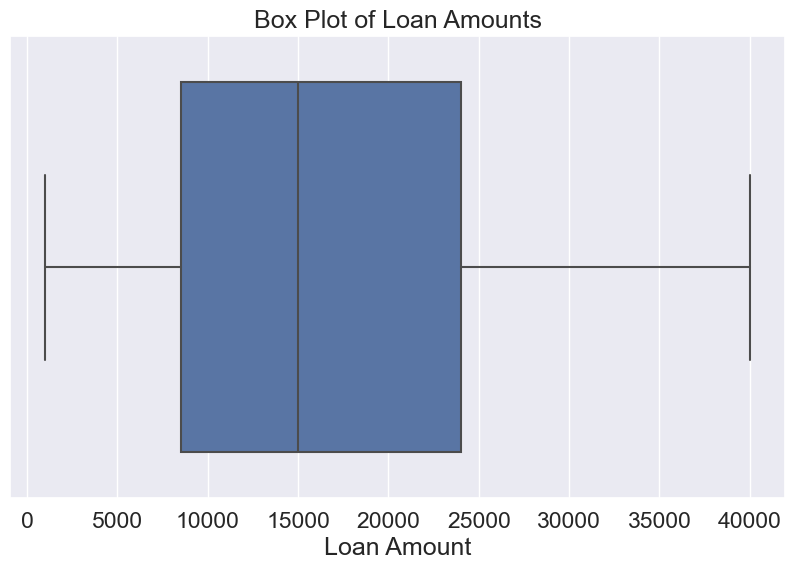

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_data['loan_amount'])
plt.title('Box Plot of Loan Amounts')
plt.xlabel('Loan Amount')
plt.show()

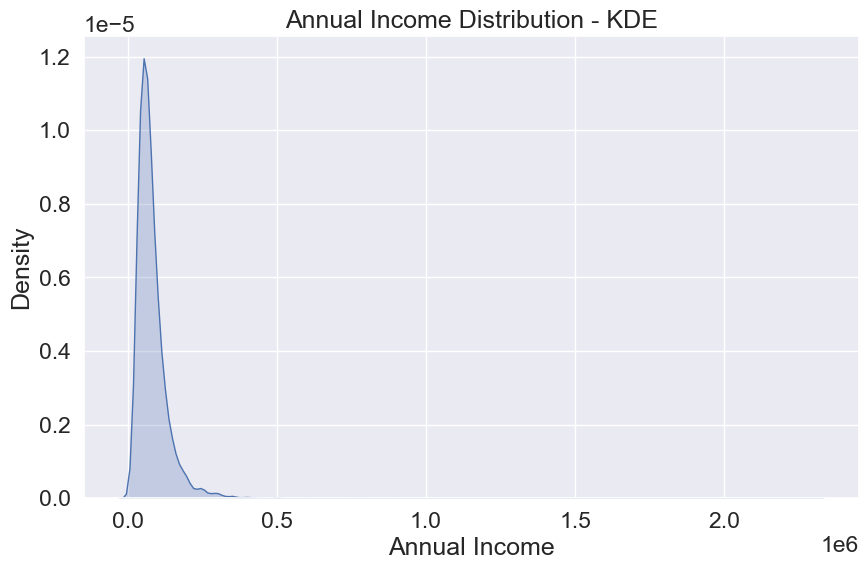

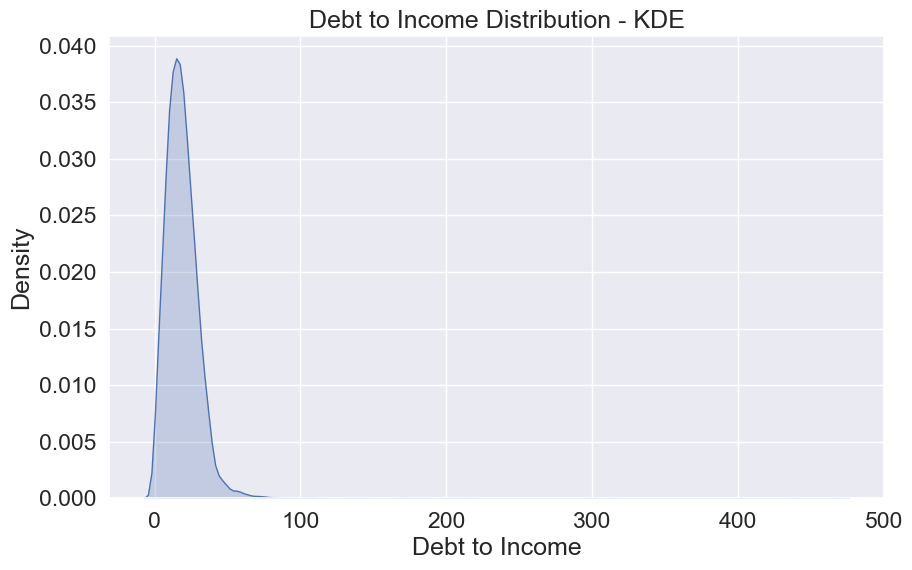

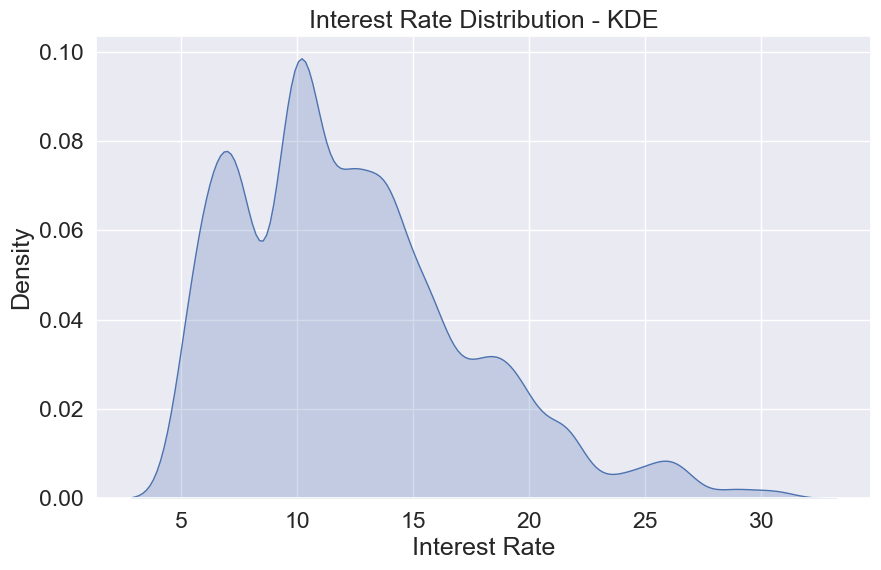

In [78]:
## KDE plots:
plt.figure(figsize=(10, 6))
sns.kdeplot(loan_data['annual_income'], shade=True)
plt.title('Annual Income Distribution - KDE')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(loan_data['debt_to_income'], shade=True)
plt.title('Debt to Income Distribution - KDE')
plt.xlabel('Debt to Income')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(loan_data['interest_rate'], shade=True)
plt.title('Interest Rate Distribution - KDE')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.show()

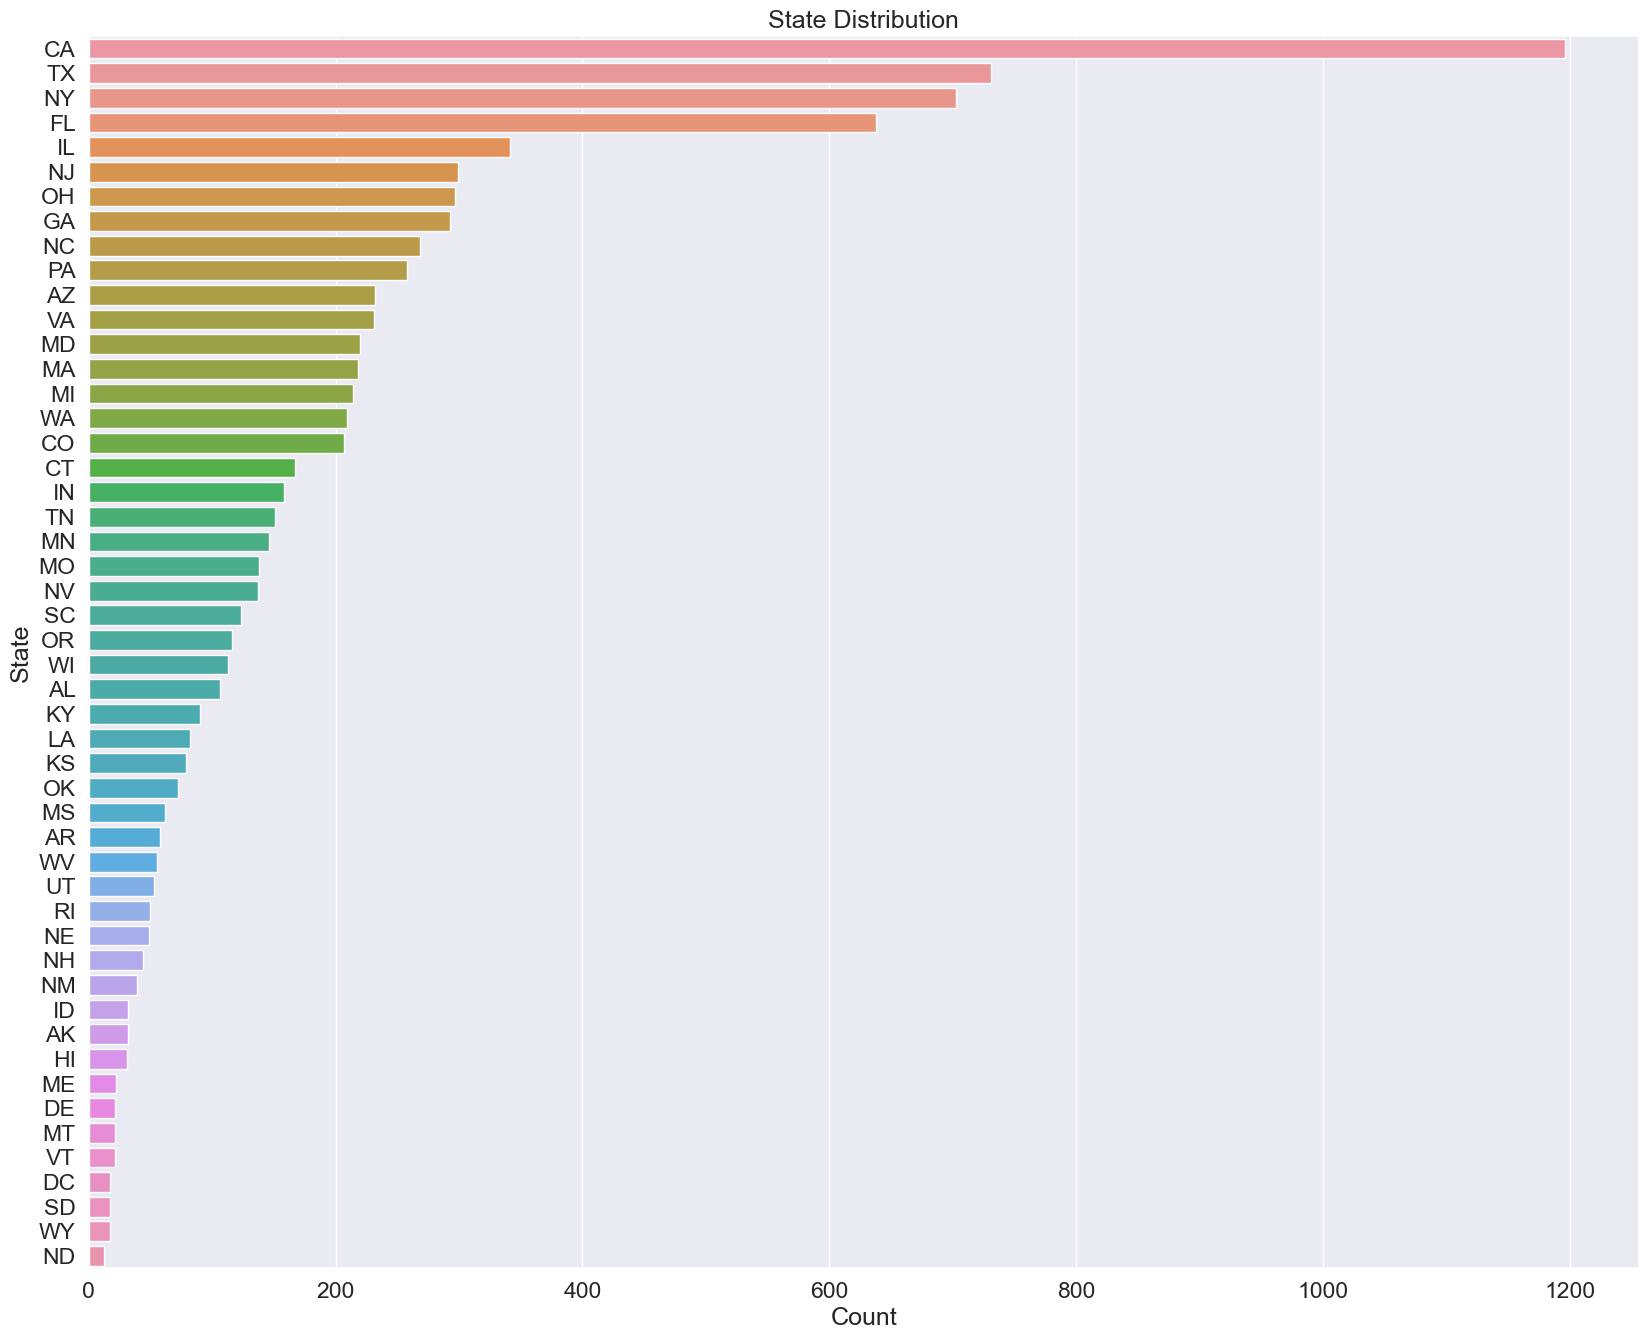

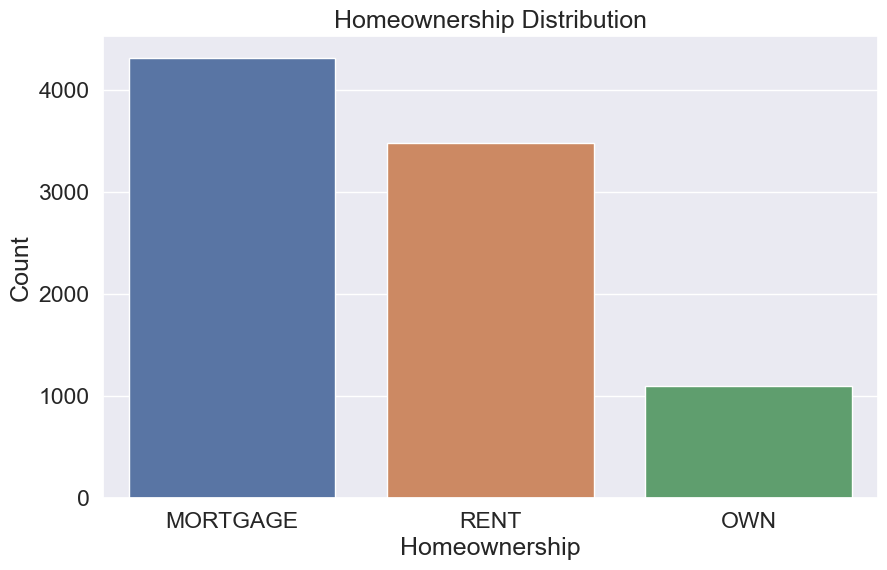

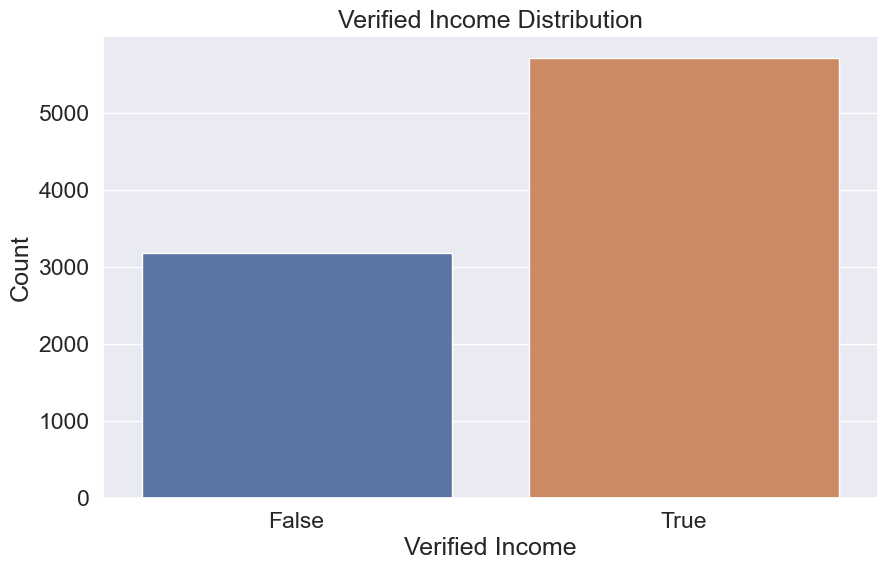

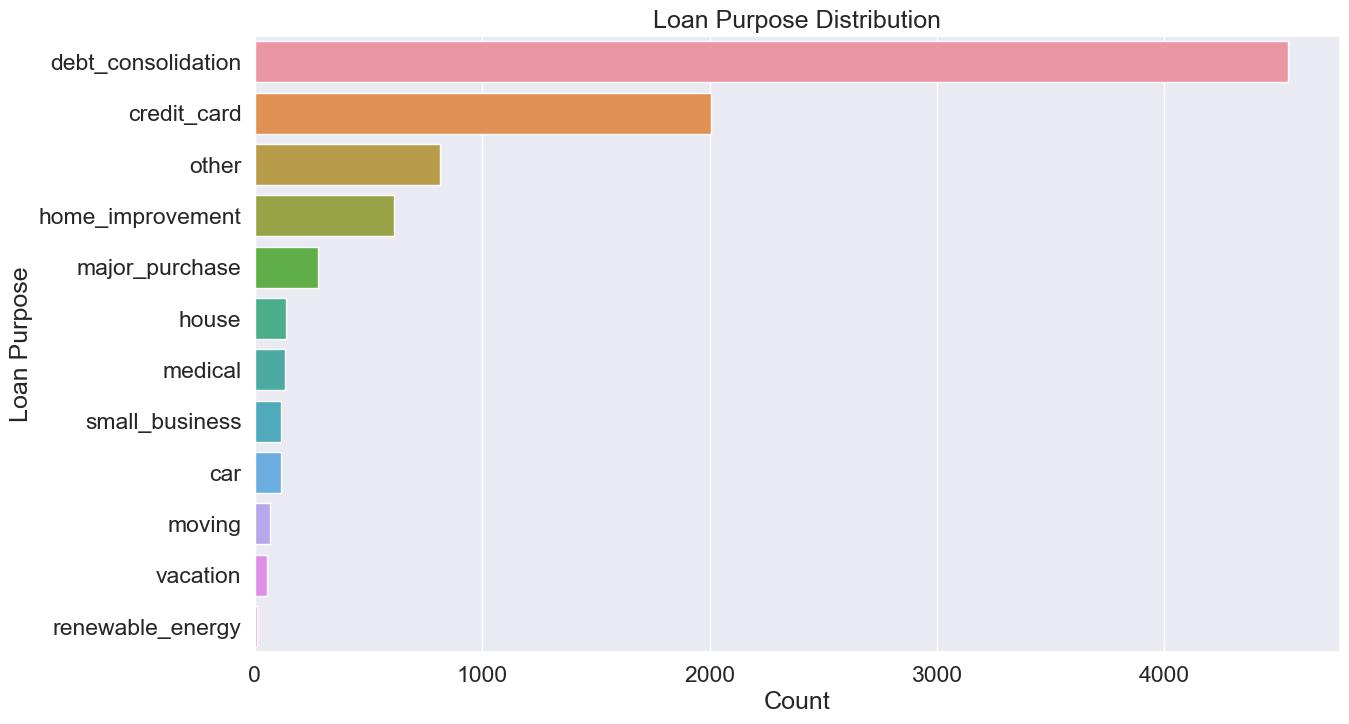

In [79]:
# Frequency Counts
plt.figure(figsize=(20, 16))
sns.countplot(y='state', data=loan_data, order=loan_data['state'].value_counts().index)
plt.title('State Distribution')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='homeownership', data=loan_data)
plt.title('Homeownership Distribution')
plt.xlabel('Homeownership')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='verified_income', data=loan_data)
plt.title('Verified Income Distribution')
plt.xlabel('Verified Income')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(y='loan_purpose', data=loan_data, order=loan_data['loan_purpose'].value_counts().index)
plt.title('Loan Purpose Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'moving'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'other'),
  Text(3, 0, 'credit_card'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'house'),
  Text(6, 0, 'small_business'),
  Text(7, 0, 'car'),
  Text(8, 0, 'major_purchase'),
  Text(9, 0, 'medical'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'renewable_energy')])

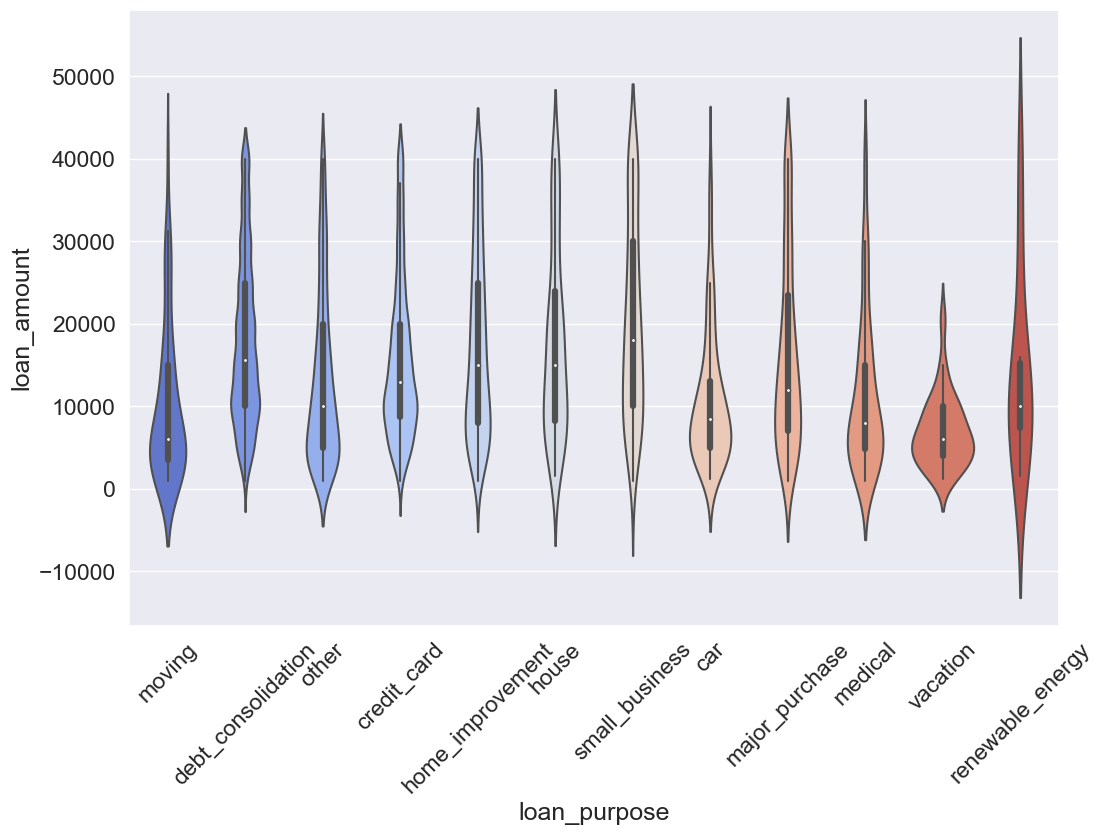

In [80]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=loan_data[loan_data['loan_purpose'].isin(loan_data['loan_purpose'].value_counts().index[:20])], x='loan_purpose', y='loan_amount', palette="coolwarm")
plt.xticks(rotation=45)

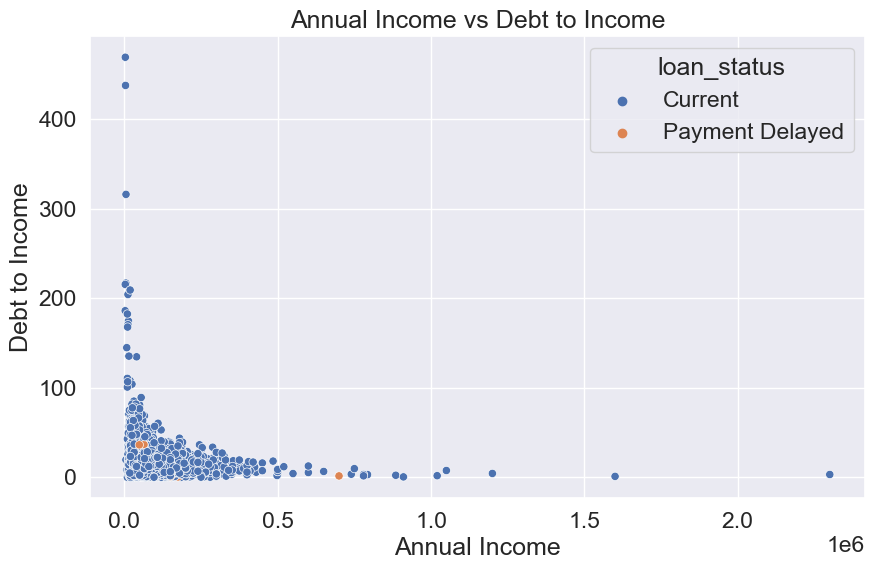

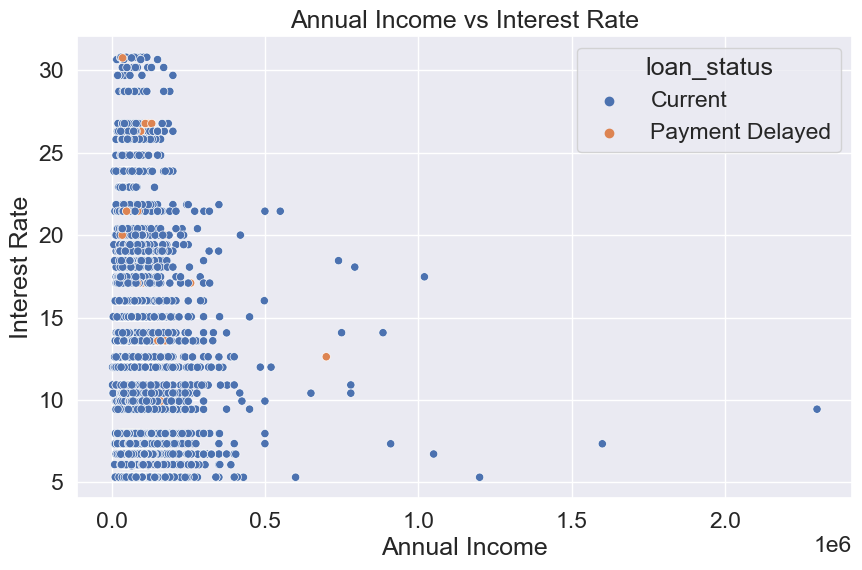

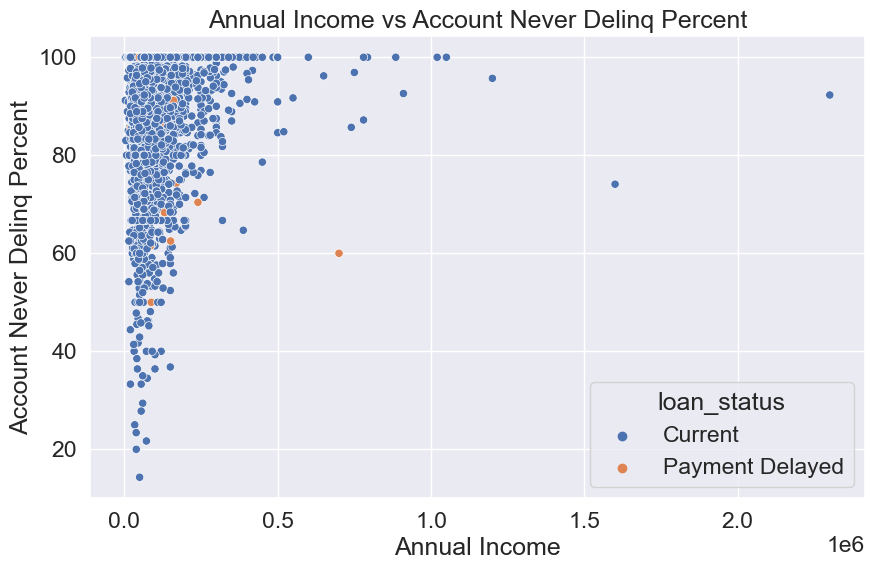

In [81]:
# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='debt_to_income', hue='loan_status', data=loan_data)
plt.title('Annual Income vs Debt to Income')
plt.xlabel('Annual Income')
plt.ylabel('Debt to Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='interest_rate', hue='loan_status', data=loan_data)
plt.title('Annual Income vs Interest Rate')
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='account_never_delinq_percent', hue='loan_status', data=loan_data)
plt.title('Annual Income vs Account Never Delinq Percent')
plt.xlabel('Annual Income')
plt.ylabel('Account Never Delinq Percent')
plt.show()


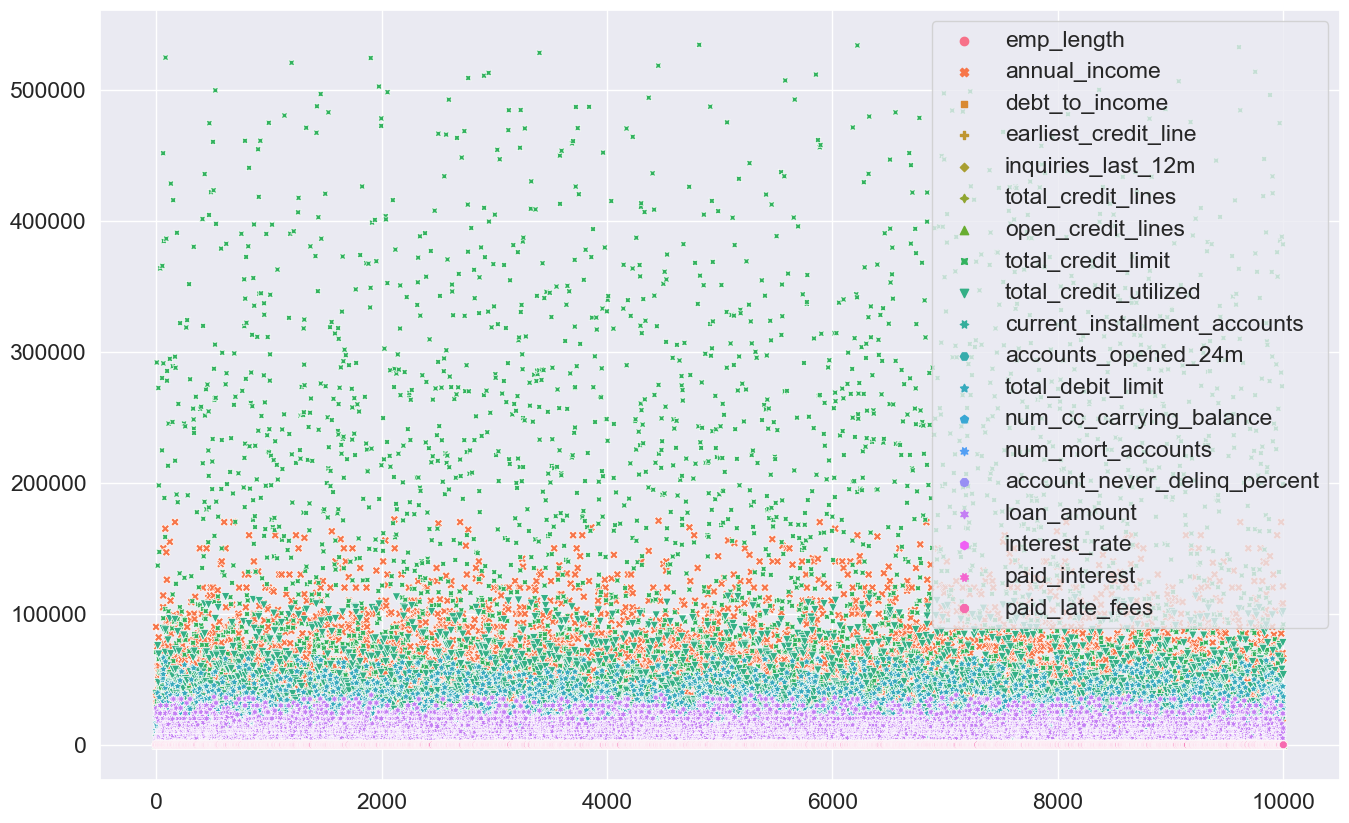

In [82]:
plt.figure(figsize=(16, 10))
sns.scatterplot(num)
plt.show()

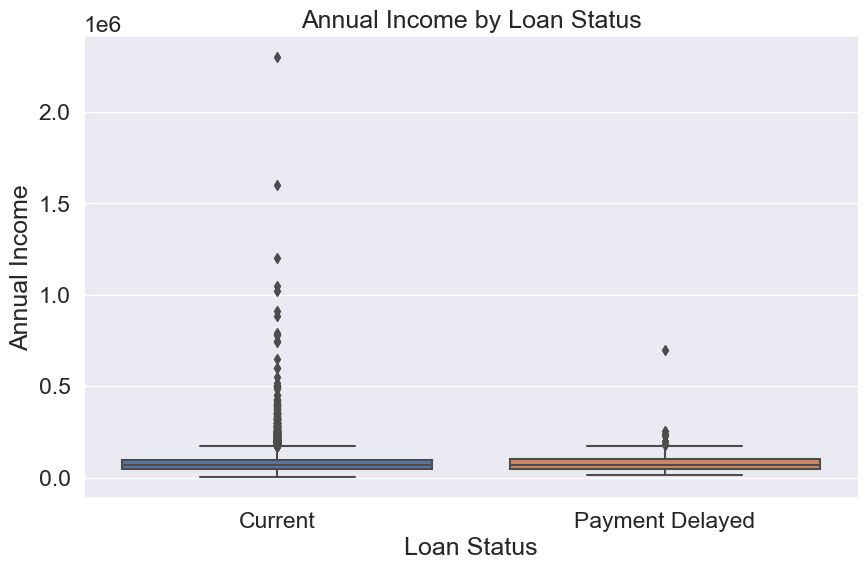

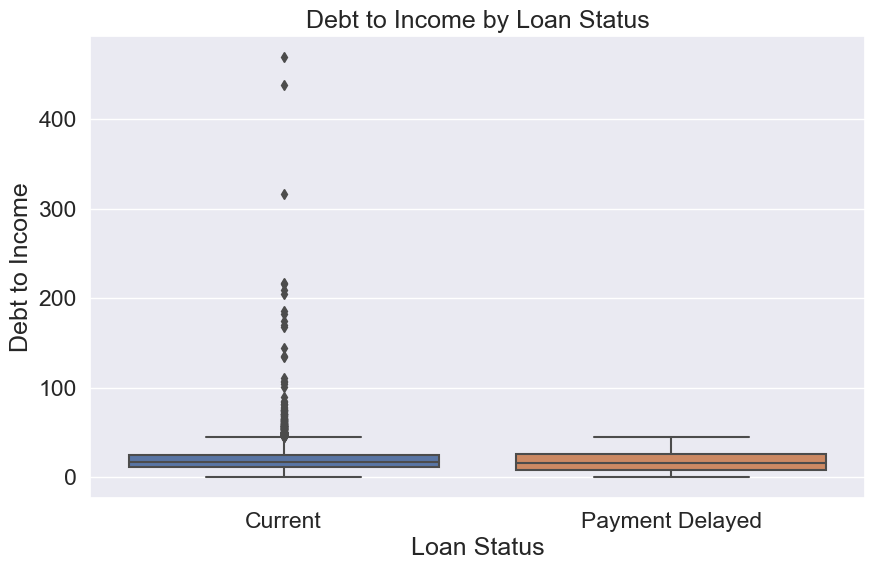

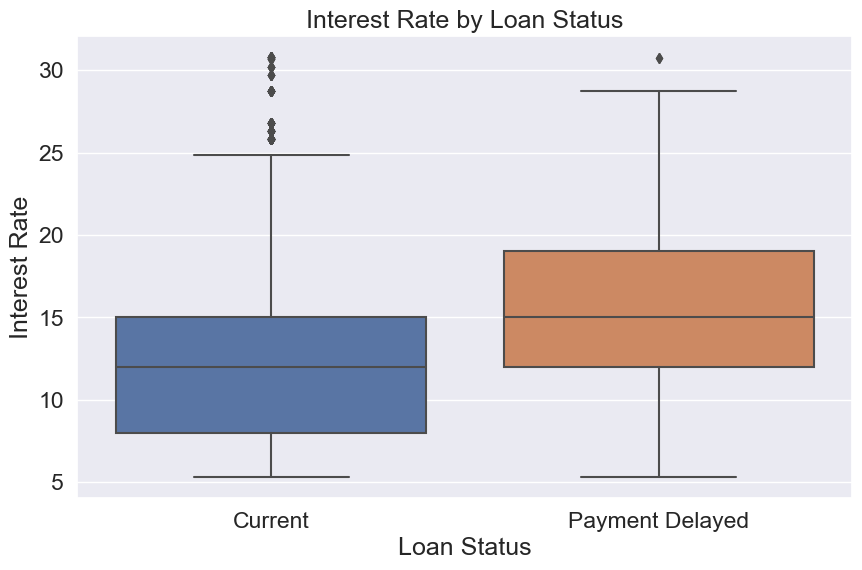

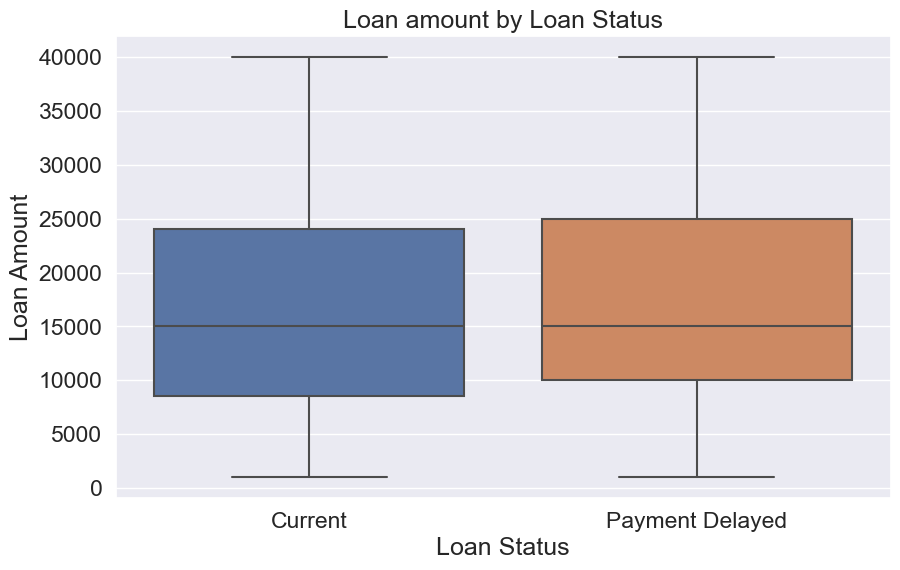

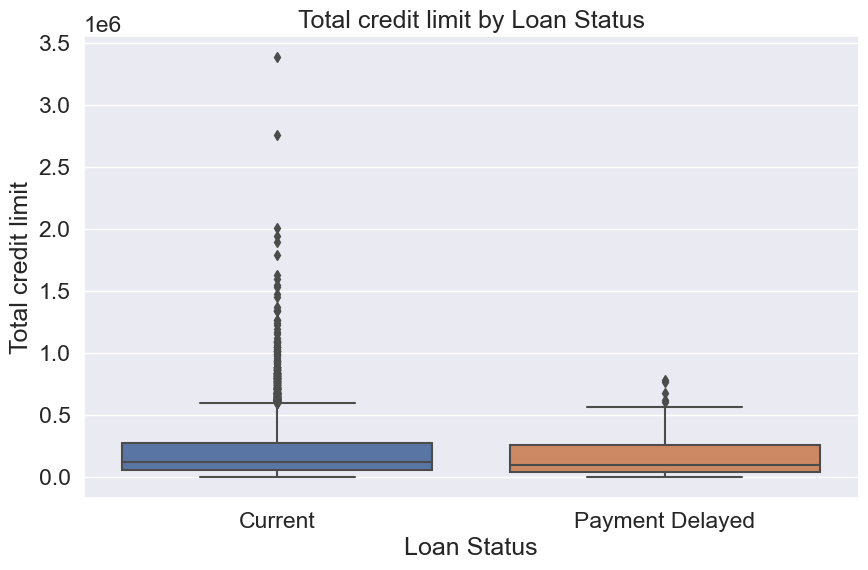

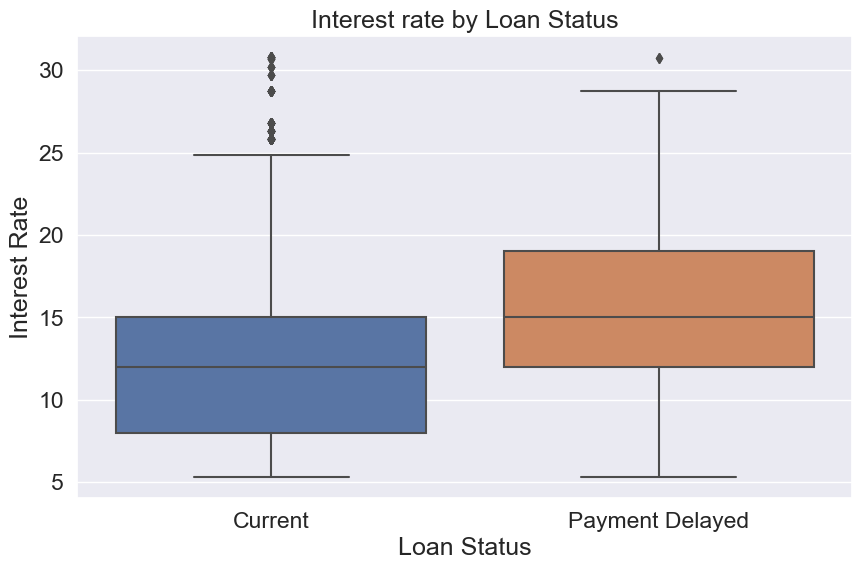

In [83]:
# Box Plots by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_income', data=loan_data)
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='debt_to_income', data=loan_data)
plt.title('Debt to Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='interest_rate', data=loan_data)
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=loan_data)
plt.title('Loan amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='total_credit_limit', data=loan_data)
plt.title('Total credit limit by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Total credit limit')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='interest_rate', data=loan_data)
plt.title('Interest rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

In [84]:
loan_data.disbursement_method.info()

<class 'pandas.core.series.Series'>
Index: 8886 entries, 0 to 9999
Series name: disbursement_method
Non-Null Count  Dtype 
--------------  ----- 
8886 non-null   object
dtypes: object(1)
memory usage: 138.8+ KB


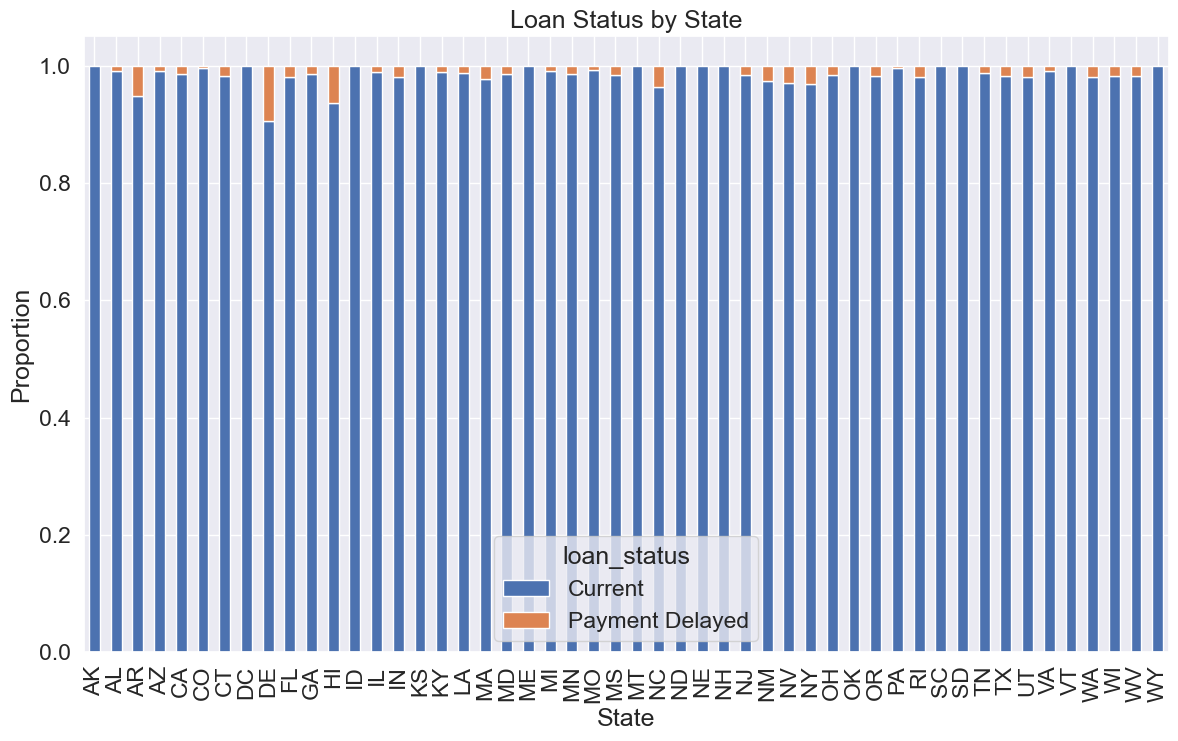

In [85]:
pd.crosstab(loan_data['state'], loan_data['loan_status'], normalize='index').plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Loan Status by State')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.show()

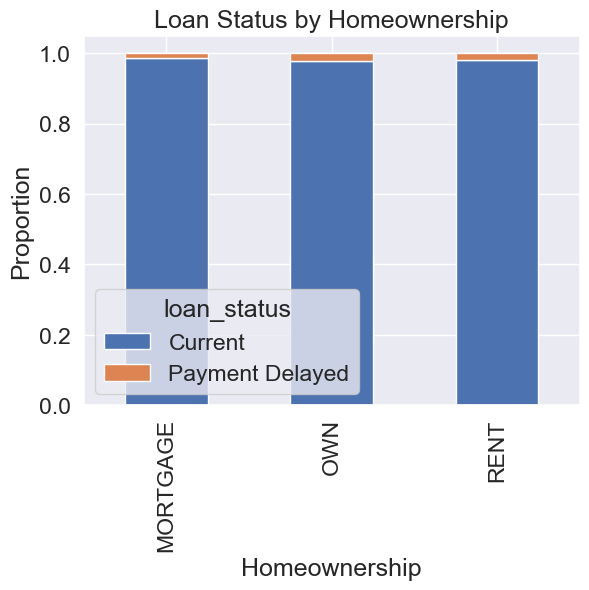

In [86]:
pd.crosstab(loan_data['homeownership'], loan_data['loan_status'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Loan Status by Homeownership')
plt.xlabel('Homeownership')
plt.ylabel('Proportion')
plt.show()

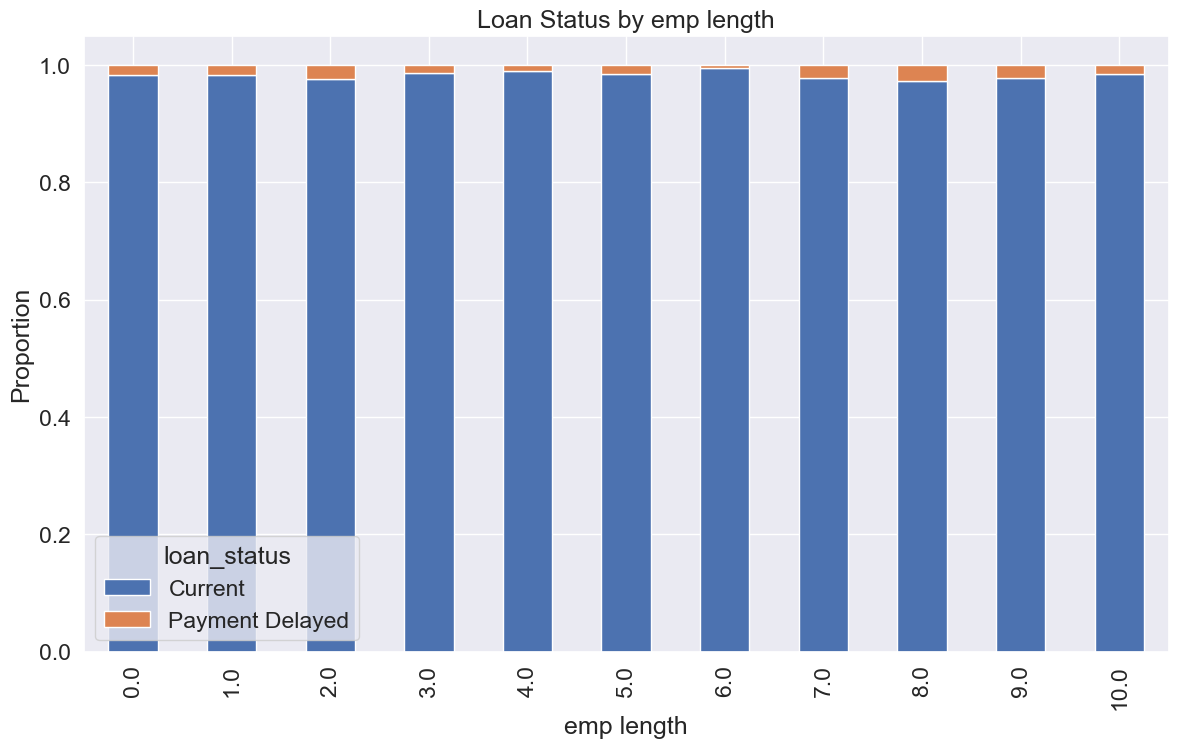

In [87]:
pd.crosstab(loan_data['emp_length'], loan_data['loan_status'], normalize='index').plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Loan Status by emp length')
plt.xlabel('emp length')
plt.ylabel('Proportion')
plt.show()

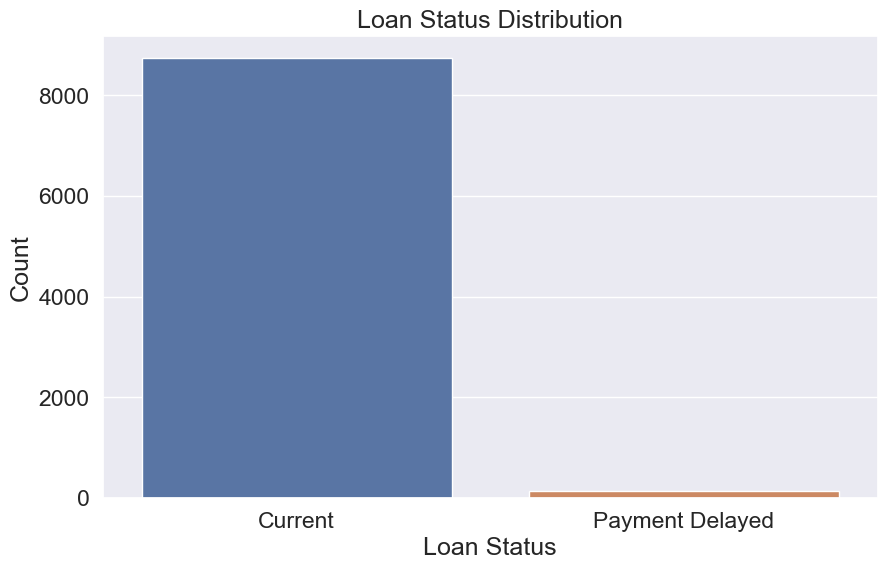

In [88]:
# Target Variable Analysis
# Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=loan_data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

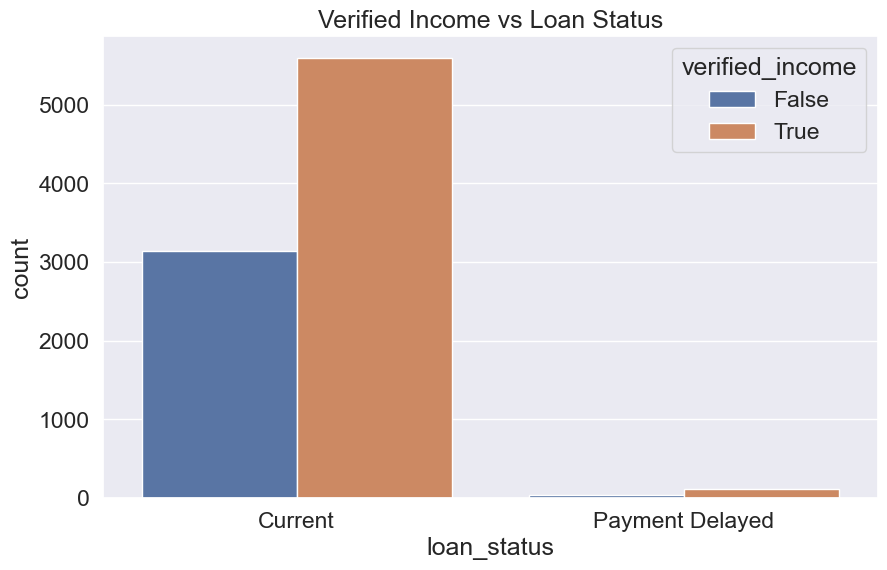

In [89]:
# Verified Income vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='loan_status', hue='verified_income')
plt.title('Verified Income vs Loan Status')
plt.show()

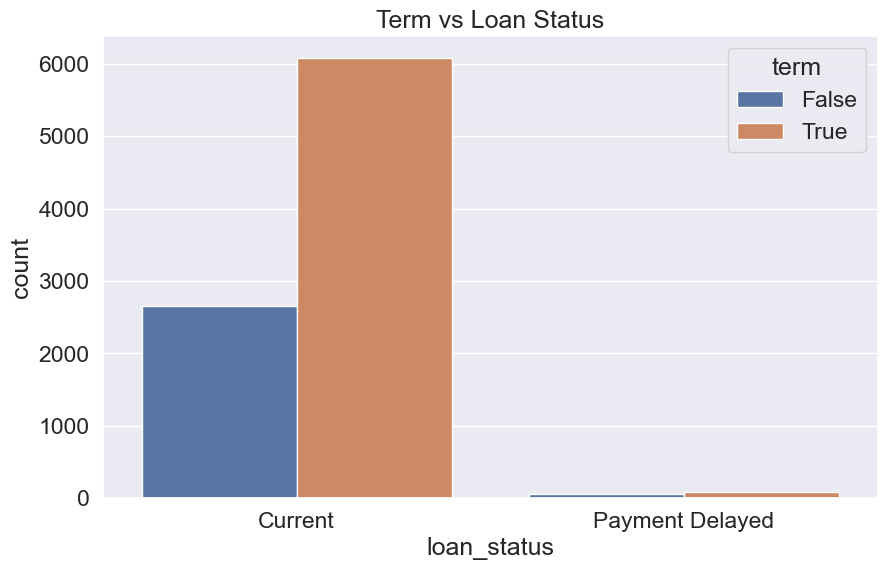

In [90]:
# term vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='loan_status', hue='term')
plt.title('Term vs Loan Status')
plt.show()

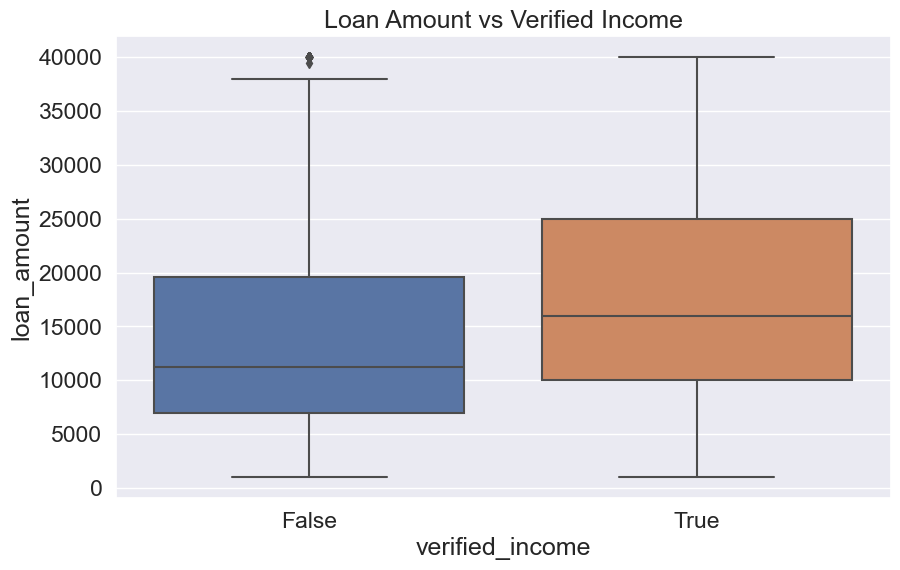

In [91]:
# Loan Amount vs Verified Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data, x='verified_income', y='loan_amount')
plt.title('Loan Amount vs Verified Income')
plt.show()

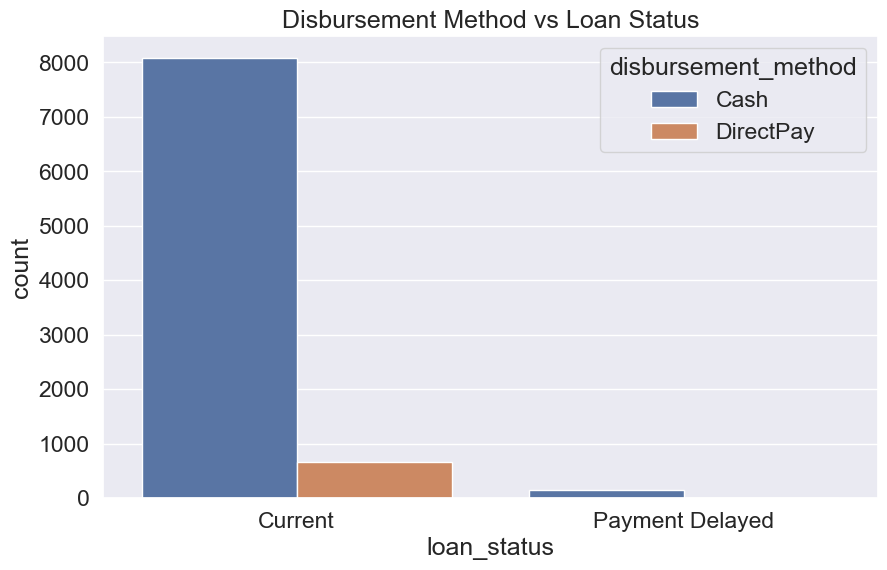

In [92]:
# Disbursement Method vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='loan_status', hue='disbursement_method')
plt.title('Disbursement Method vs Loan Status')
plt.show()

##### Statistic test: 

In [93]:
contingency_table = pd.crosstab(loan_data['loan_status'], loan_data['verified_income'])
contingency_table

verified_income  False  True 
loan_status                  
Current           3147   5592
Payment Delayed     35    112

In [94]:
chi2, p, __, __ = stats.chi2_contingency(contingency_table)
chi2, p, __, __

(8.840016028242086,
 0.002946965573019829,
 array([[3129.36056718, 5609.63943282],
        [  52.63943282,   94.36056718]]),
 array([[3129.36056718, 5609.63943282],
        [  52.63943282,   94.36056718]]))

In [95]:
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Statistic: 8.840016028242086
P-Value: 0.002946965573019829


In [96]:
alpha = 0.05
if p < alpha:
    print("\nReject the null hypothesis: There is a significant association between loan_status and verified_income.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between loan_status and verified_income.")


Reject the null hypothesis: There is a significant association between loan_status and verified_income.


##  Data Processing: 

In [97]:
loan_data['loan_status']=loan_data['loan_status']=='Current'

In [98]:
loan_data['loan_status'].value_counts()

loan_status
True     8739
False     147
Name: count, dtype: int64

#### X-y split:

In [99]:
X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

#### Modeling:

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
print(f'100% of our data: {len(loan_data)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 8886.
70% for training data: 6220.
30% for test data: 2666.


### Selecting the model: LinearRegression.

In [105]:
model=LinearRegression()
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'CA'